In [95]:
import scipy.io as sio

# Load the pubmed dataset as an example
pubmed_data = sio.loadmat('Données_relationnelles/cora.mat')
print(pubmed_data.keys())  # This will show the keys: 'fea', 'W', 'gnd'

# Extract feature matrix (X), adjacency matrix (W), and labels (gnd)
X_pubmed = pubmed_data['fea']
W_pubmed = pubmed_data['W'] ## matrice d'ajacence
gnd_pubmed = pubmed_data['gnd'].flatten()  # Flatten to make it a 1D arrayc'est les labels


dict_keys(['__header__', '__version__', '__globals__', 'W', 'fea', 'gnd'])


In [2]:
pubmed_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:36:27 2019',
 '__version__': '1.0',
 '__globals__': [],
 'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8),
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [5],
        [5],
        ...,
        [4],
        [4],
        [4]], dtype=uint8)}

In [96]:
import numpy as np

# Shapes of matrices
print(f"Shape of feature matrix X: {X_pubmed.shape}")
print(f"Shape of adjacency matrix W: {W_pubmed.shape}")
print(f"Shape of labels gnd: {gnd_pubmed.shape}")

# Basic statistics about the labels
unique_labels, label_counts = np.unique(gnd_pubmed, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Label counts: {label_counts}")


Shape of feature matrix X: (2708, 1433)
Shape of adjacency matrix W: (2708, 2708)
Shape of labels gnd: (2708,)
Unique labels: [1 2 3 4 5 6 7]
Label counts: [351 217 418 818 426 298 180]


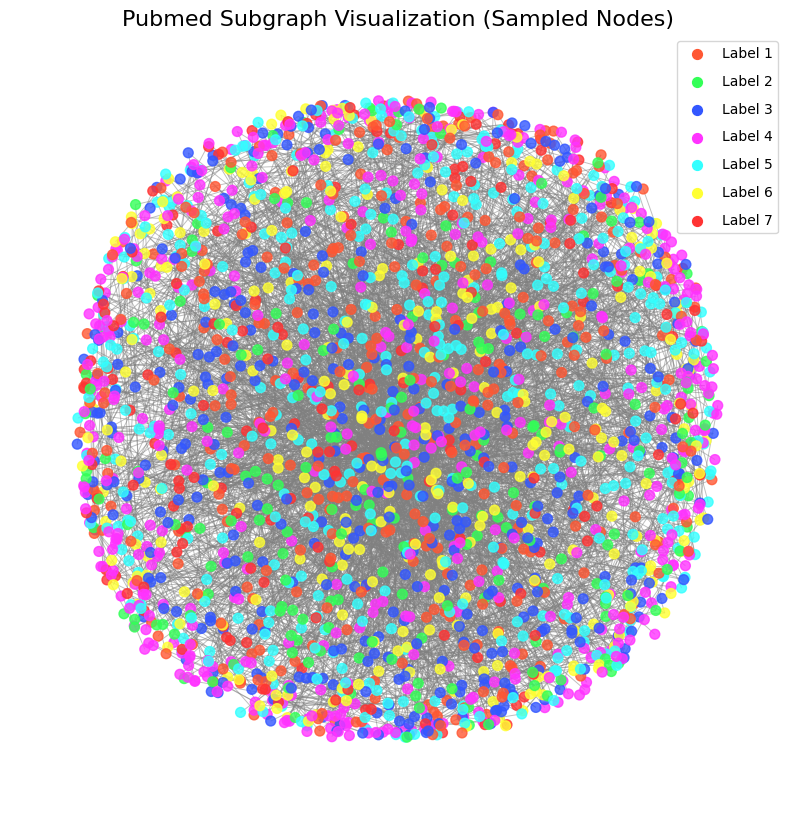

In [97]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import ListedColormap
import numpy as np
import scipy.sparse as sp

# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Convert the SciPy sparse matrix to a graph
graph = nx.from_scipy_sparse_array(W_pubmed_sparse)

# Sample nodes to create a smaller subgraph
labels = gnd_pubmed  # Labels (1, 2, 3, 4, 5, 6, 7)
unique_labels = np.unique(labels)
nodes_per_label = 500
sampled_nodes = []

for label in unique_labels:
    # Find all nodes with the current label
    nodes_with_label = np.where(labels == label)[0]
    
    # Determine the sample size
    sample_size = min(nodes_per_label, len(nodes_with_label))
    
    # Randomly sample nodes from this label
    sampled_nodes.extend(np.random.choice(nodes_with_label, size=sample_size, replace=False))

# Create a subgraph with sampled nodes
subgraph = graph.subgraph(sampled_nodes)

# Assign labels and map colors
color_map = ListedColormap(['#FF5733', '#33FF57', '#3357FF', '#FF33FF', '#33FFFF', '#FFFF33', '#FF3333'])  # Colors for each label
node_colors = [color_map.colors[labels[node] - 1] for node in subgraph.nodes]

# Compute a spring layout for the subgraph
layout = nx.spring_layout(subgraph, seed=42, k=0.3)

# Visualize the subgraph
plt.figure(figsize=(10, 10))  # Adjust figure size

# Draw nodes and edges
nx.draw_networkx_nodes(subgraph, layout, node_size=50, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(subgraph, layout, edge_color='gray', alpha=0.5, width=0.7)

# Add legend for node labels
for idx, label in enumerate(unique_labels):
    plt.scatter([], [], c=color_map.colors[idx], label=f"Label {label}", s=50)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, loc='upper right')

# Add title and show the graph
plt.title("Pubmed Subgraph Visualization (Sampled Nodes)", fontsize=16)
plt.axis("off")
plt.show()

In [98]:
import numpy as np

# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Nombre total de connexions
total_connections = W_pubmed_sparse.nnz  # Nombre d'éléments non nuls dans la matrice

# Liste des lignes, colonnes et valeurs de la matrice d'adjacence
rows, cols = W_pubmed_sparse.nonzero()

# Compter les connexions internes et externes
internal_connections = 0
external_connections = 0

for i, j in zip(rows, cols):
    if gnd_pubmed[i] == gnd_pubmed[j]:
        internal_connections += 1
    else:
        external_connections += 1

# Calcul des proportions
prop_internal = internal_connections / total_connections
prop_external = external_connections / total_connections

print(f"Proportion des connexions internes (même catégorie) : {prop_internal:.2%}")
print(f"Proportion des connexions externes (différentes catégories) : {prop_external:.2%}")


Proportion des connexions internes (même catégorie) : 81.00%
Proportion des connexions externes (différentes catégories) : 19.00%


Dans l'ensemble de données Cora, nous avons observé les connexions entre les publications scientifiques :

- **Proportion des connexions internes (même catégorie)** : **81,00%**
  
  Cela signifie que 81% des liens (citations) dans le réseau relient des publications appartenant à la **même catégorie**. Les publications dans Cora sont classées en sept catégories différentes, et une majorité des citations se produisent entre publications d'une même catégorie.

- **Proportion des connexions externes (différentes catégories)** : **19,00%**
  
  En revanche, 19% des liens relient des publications appartenant à **des catégories différentes**. Cela indique qu'il existe une certaine interaction entre les catégories, bien que celles-ci soient moins fréquentes par rapport aux connexions internes.


##### EDA

Feature Matrix X_pubmed Shape: (2708, 1433)
Adjacency Matrix W_pubmed Shape: (2708, 2708)
Labels Shape: (2708,)
Unique Labels: [1 2 3 4 5 6 7]
Label Counts: [351 217 418 818 426 298 180]


C:\Users\Fares\AppData\Local\Temp\ipykernel_11048\274803404.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=label_counts, palette="viridis")


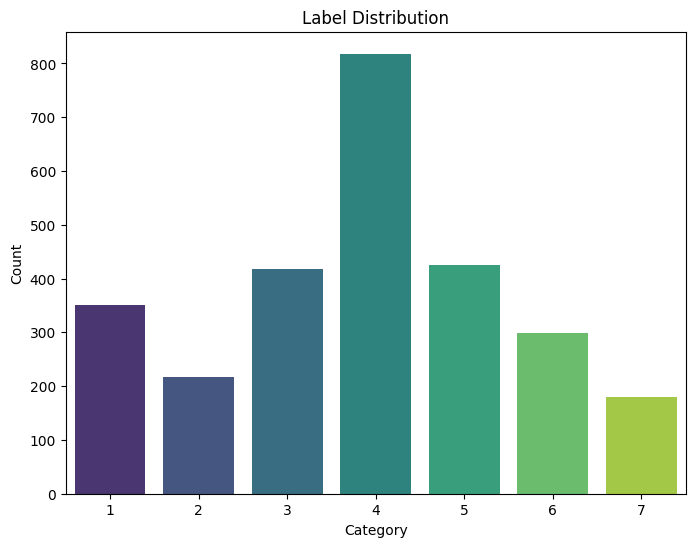

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import networkx as nx

# Step 1: Dataset Overview
print("Feature Matrix X_pubmed Shape:", X_pubmed.shape)
print("Adjacency Matrix W_pubmed Shape:", W_pubmed.shape)
print("Labels Shape:", gnd_pubmed.shape)

unique_labels, label_counts = np.unique(gnd_pubmed, return_counts=True)
print("Unique Labels:", unique_labels)
print("Label Counts:", label_counts)

# Plot Label Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_labels, y=label_counts, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()




On a un desequillibre de classes

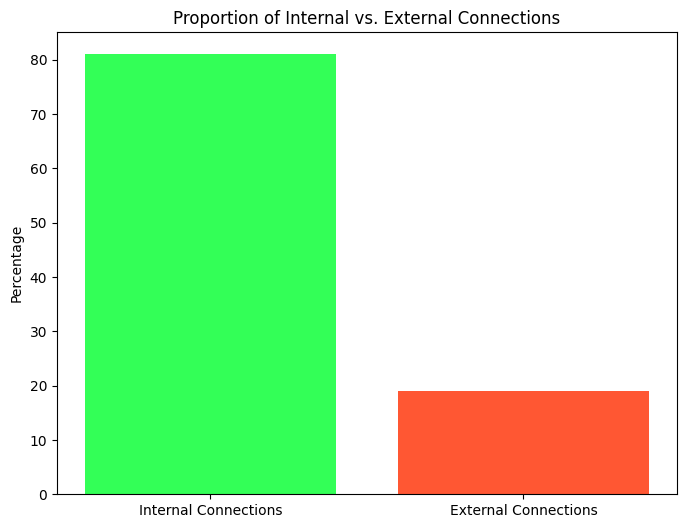

Proportion of Internal Connections: 81.00%
Proportion of External Connections: 19.00%


In [6]:
# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Step 2: Proportion of Internal vs. External Connections
internal_connections = 0
external_connections = 0

for node in range(W_pubmed_sparse.shape[0]):
    neighbors = W_pubmed_sparse[node].nonzero()[1]
    for neighbor in neighbors:
        if gnd_pubmed[node] == gnd_pubmed[neighbor]:
            internal_connections += 1
        else:
            external_connections += 1

total_connections = internal_connections + external_connections
internal_prop = internal_connections / total_connections * 100
external_prop = external_connections / total_connections * 100

# Plot Proportions
plt.figure(figsize=(8, 6))
plt.bar(["Internal Connections", "External Connections"], [internal_prop, external_prop], color=["#33FF57", "#FF5733"])
plt.title("Proportion of Internal vs. External Connections")
plt.ylabel("Percentage")
plt.show()

print(f"Proportion of Internal Connections: {internal_prop:.2f}%")
print(f"Proportion of External Connections: {external_prop:.2f}%")

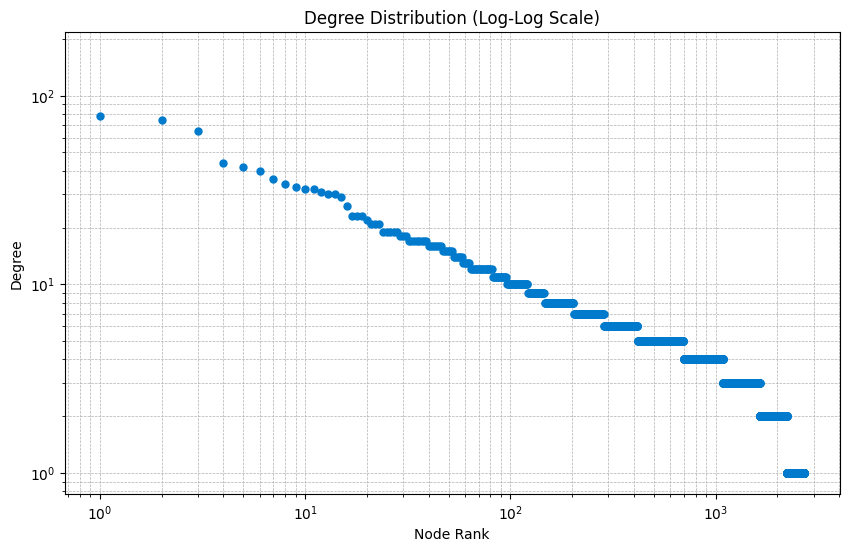

In [7]:
# Step 3: Degree Distribution
graph = nx.from_scipy_sparse_array(W_pubmed_sparse)
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)

plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, marker="o", color="#007acc", markersize=5, linestyle="None")
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Node Rank")
plt.ylabel("Degree")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



La distribution est quasi normale

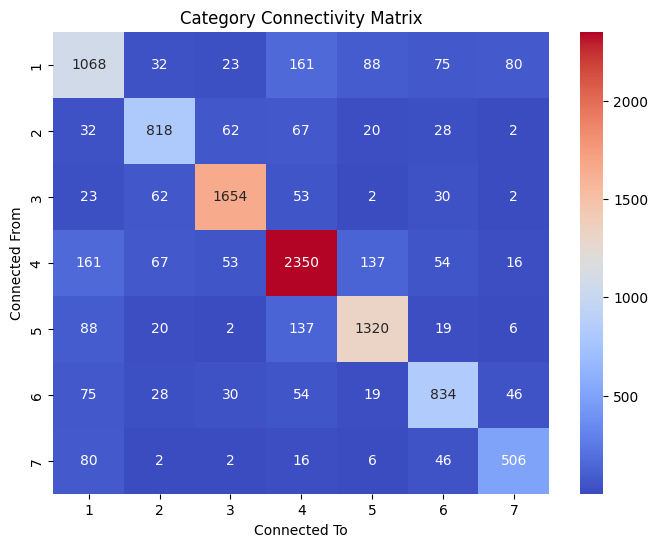

In [9]:
# Step 4: Category Connectivity Matrix
connectivity_matrix = np.zeros((len(unique_labels), len(unique_labels)))

for node in range(W_pubmed_sparse.shape[0]):
    neighbors = W_pubmed_sparse[node].nonzero()[1]
    for neighbor in neighbors:
        connectivity_matrix[gnd_pubmed[node] - 1, gnd_pubmed[neighbor] - 1] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(connectivity_matrix, annot=True, fmt=".0f", cmap="coolwarm", xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Category Connectivity Matrix")
plt.xlabel("Connected To")
plt.ylabel("Connected From")
plt.show()



In [99]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Step 6: Feature Space Exploration (PCA in 3D)
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(W_pubmed_sparse)

# Convert to DataFrame for easier handling in Plotly
pca_df = pd.DataFrame(X_pca_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Label'] = gnd_pubmed

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    z='Principal Component 3',
    color=pca_df['Label'].astype(str),  # Color points by label
    title="Feature Space Visualization (PCA in 3D)",
    labels={'color': 'Label'},  # Legend label
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    legend=dict(title="Labels", itemsizing='constant')
)

# Show the interactive plot
fig.show()

On ne peut pas voir une claire separation entre les categories

Les données relationnelles incluent une matrice objets/caractéristiques et un graphe de liens entre objets. Bien que ces deux types d'information soient utiles, ils peuvent manquer de cohérence et nécessitent un alignement précis pour optimiser la classification. Ce projet vise à aborder ce problème et à mettre en lumière les défis posés par ces données aux méthodes de classification.

## Approches de combinaison des features x-pubmed et les lien w-pubmed

In [25]:
from sklearn.model_selection import train_test_split


gnd_pubmed = gnd_pubmed - 1


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_pubmed,           # Feature matrix
    gnd_pubmed,         # Labels
    test_size=0.3,      # 30% for testing, 70% for training
    random_state=42,    # Ensures reproducibility
    stratify=gnd_pubmed # Preserves the distribution of labels across splits
)

# Print the shapes to verify
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(1895, 1433), y_train=(1895,)
Testing set shape: X_test=(813, 1433), y_test=(813,)


In [9]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes to verify
print(f"Training set shape: X_train_scaled={X_train_scaled.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test_scaled={X_test_scaled.shape}, y_test={y_test.shape}")

Training set shape: X_train_scaled=(1895, 1433), y_train=(1895,)
Testing set shape: X_test_scaled=(813, 1433), y_test=(813,)


### Aproche 1 : 
 1. Uniquement l’information contenue dans la matrice X


#### Logistic Regression

In [10]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.4058
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.8153
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lb

##### Résultats de l'évaluation : Régression Logistique

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.4058               | {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}          |
| Undersampling (NearMiss)   | 0.8153               | {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}            |
| Combination (SMOTETomek)   | 0.9979               | {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}          |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.79%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est modérée (**40.58%**), suggérant que l'échantillonnage par suréchantillonnage seul n'est pas suffisant pour optimiser le modèle.
   - Les données artificielles créées par SMOTE semblent ne pas ajouter suffisamment d'information discriminante pour améliorer les performances de la régression logistique.

2. **Undersampling (NearMiss)** :
   - La précision est significativement meilleure (**81.53%**) grâce à l'élimination des échantillons redondants de la classe majoritaire.
   - Cependant, l'undersampling peut entraîner une perte d'information, limitant son efficacité pour des modèles nécessitant un grand volume de données.

3. **Combination (SMOTETomek)** :
   - Avec une précision quasi-parfaite (**99.79%**), cette méthode combine les avantages du suréchantillonnage et du sous-échantillonnage.
   - SMOTETomek réduit le bruit tout en augmentant les échantillons représentatifs des classes minoritaires, permettant une meilleure généralisation du modèle.

---


Training the best model (Combination) with parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


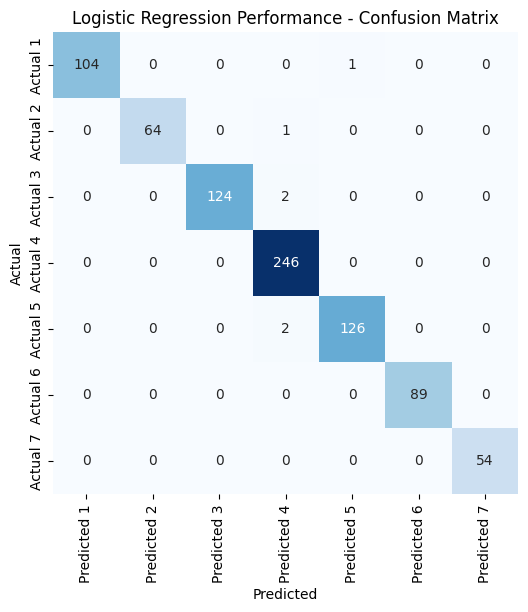


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       105
           2       1.00      0.98      0.99        65
           3       1.00      0.98      0.99       126
           4       0.98      1.00      0.99       246
           5       0.99      0.98      0.99       128
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        54

    accuracy                           0.99       813
   macro avg       1.00      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813


Logistic Regression Performance - NMI: 0.98
Logistic Regression Performance - F1-score: 0.99


In [11]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Tree

In [12]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 5}
Accuracy for Decision Tree (Oversampling): 0.1551
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 10}
Accuracy for Decision Tree (Undersampling): 0.7103
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9963

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9963
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': None, 'min_samples

##### Résultats de l'évaluation : Arbre de Décision

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1551               | {'max_depth': None, 'min_samples_split': 5}             |
| Undersampling (NearMiss)   | 0.7103               | {'max_depth': None, 'min_samples_split': 10}            |
| Combination (SMOTETomek)   | 0.9963               | {'max_depth': None, 'min_samples_split': 2}             |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.63%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision est extrêmement basse (**15.51%**), indiquant que cette méthode est inefficace pour l'arbre de décision dans ce cas.
   - Les échantillons synthétiques générés par SMOTE ne semblent pas contribuer à améliorer les performances de séparation des classes.

2. **Undersampling (NearMiss)** :
   - Une amélioration significative (**71.03%**) montre que l'élimination des données redondantes de la classe majoritaire permet une meilleure performance.
   - Cependant, cette méthode réduit considérablement le volume de données, ce qui peut limiter la capacité de l'arbre de décision à généraliser.

3. **Combination (SMOTETomek)** :
   - La précision quasi-parfaite (**99.63%**) indique que cette méthode équilibre efficacement les données en combinant suréchantillonnage et sous-échantillonnage.
   - SMOTETomek réduit les bruitages tout en augmentant les échantillons représentatifs des classes minoritaires, permettant une généralisation optimale avec l'arbre de décision.

---



Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


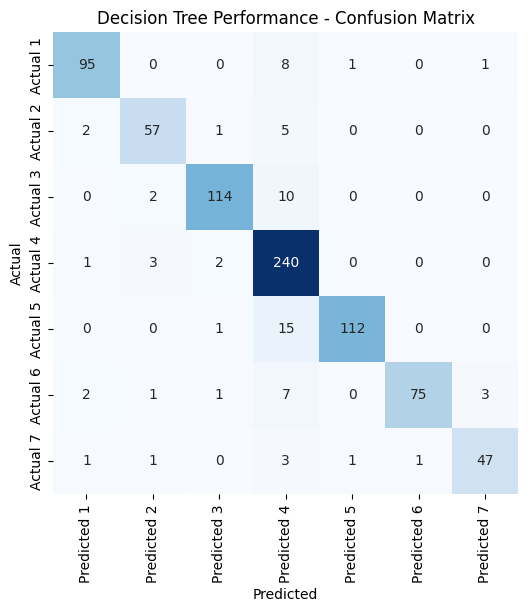


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       105
           2       0.89      0.88      0.88        65
           3       0.96      0.90      0.93       126
           4       0.83      0.98      0.90       246
           5       0.98      0.88      0.93       128
           6       0.99      0.84      0.91        89
           7       0.92      0.87      0.90        54

    accuracy                           0.91       813
   macro avg       0.93      0.89      0.91       813
weighted avg       0.92      0.91      0.91       813


Decision Tree Performance - NMI: 0.79
Decision Tree Performance - F1-score: 0.91


In [13]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [14]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.1219
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.8227
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Combination): 0.9979

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9979
Best Sampling Method: Combination
Results: {'


markdown
Copy code
##### Résultats de l'évaluation : Forêt Aléatoire

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1219               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} |
| Undersampling (NearMiss)   | 0.8227               | {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200} |
| Combination (SMOTETomek)   | 0.9979               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.79%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision est extrêmement faible (**12.19%**), ce qui indique que l'augmentation artificielle des échantillons de la classe minoritaire ne parvient pas à améliorer les performances du modèle.
   - Cela peut s'expliquer par un manque d'adéquation entre les échantillons synthétiques et les vraies structures des données.

2. **Undersampling (NearMiss)** :
   - Une précision considérablement améliorée (**82.27%**) montre que la réduction des échantillons redondants de la classe majoritaire permet une meilleure généralisation pour le modèle.
   - Cependant, l'undersampling peut entraîner une perte d'information qui pourrait limiter l'apprentissage dans certains cas.

3. **Combination (SMOTETomek)** :
   - La meilleure précision (**99.79%**) montre l'efficacité de cette méthode qui combine suréchantillonnage et sous-échantillonnage.
   - SMOTETomek permet de réduire les biais dans les données tout en optimisant la diversité des échantillons, ce qui est particulièrement bénéfique pour la Forêt Aléatoire.

---


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


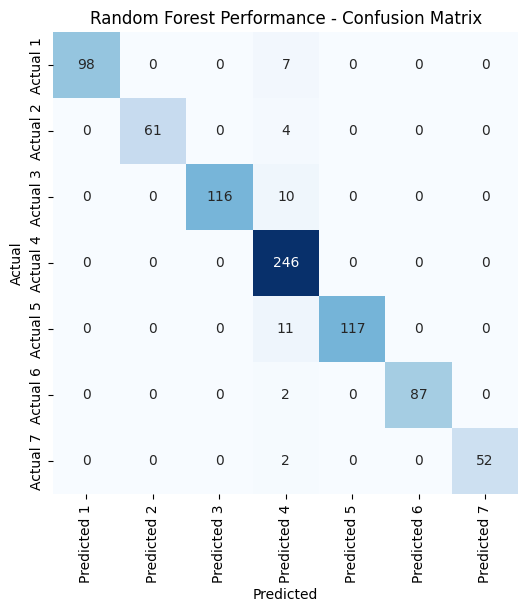


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           1       1.00      0.93      0.97       105
           2       1.00      0.94      0.97        65
           3       1.00      0.92      0.96       126
           4       0.87      1.00      0.93       246
           5       1.00      0.91      0.96       128
           6       1.00      0.98      0.99        89
           7       1.00      0.96      0.98        54

    accuracy                           0.96       813
   macro avg       0.98      0.95      0.96       813
weighted avg       0.96      0.96      0.96       813


Random Forest Performance - NMI: 0.90
Random Forest Performance - F1-score: 0.96


In [15]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [16]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1499
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.1525
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1509

Best Sampling Method for KNN: Undersampling with Accura

##### Résultats de l'évaluation : K-Nearest Neighbors (KNN)

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1499               | {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} |
| Undersampling (NearMiss)   | 0.1525               | {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} |
| Combination (SMOTETomek)   | 0.1509               | {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} |

**Meilleure Méthode de Sampling** : **Undersampling (NearMiss)** avec une précision de **15.25%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision est très basse (**14.99%**), suggérant que l'ajout d'échantillons synthétiques n'améliore pas la capacité de KNN à discriminer les classes.
   - Cela pourrait indiquer que les nouvelles données introduites par SMOTE ne sont pas suffisamment représentatives des motifs existants.

2. **Undersampling (NearMiss)** :
   - La précision la plus élevée (**15.25%**) est atteinte avec cette méthode, bien que l'amélioration soit marginale.
   - L'élimination des échantillons redondants dans la classe majoritaire semble légèrement faciliter l'apprentissage des voisins proches, mais les résultats restent faibles.

3. **Combination (SMOTETomek)** :
   - La précision (**15.09%**) est proche de celle obtenue avec le suréchantillonnage seul, montrant que la combinaison des deux techniques n’apporte pas d’amélioration significative pour KNN.
   - Cela pourrait être dû à une sensibilité particulière de KNN aux données déséquilibrées, même après traitement.

---

##### Conclusion

Les performances globales de KNN sont faibles quelle que soit la méthode de sampling utilisée, avec une précision maximale de seulement **15.25%** obtenue via **Undersampling (NearMiss)**. Cela suggère que KNN, dans ce cas, n'est pas adapté pour ce dataset, probablement en raison des caractéristiques des données ou du déséquilibre des classes. Une exploration d'autres algorithmes pourrait être nécessaire pour améliorer les résultats.



Training the best model (Undersampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

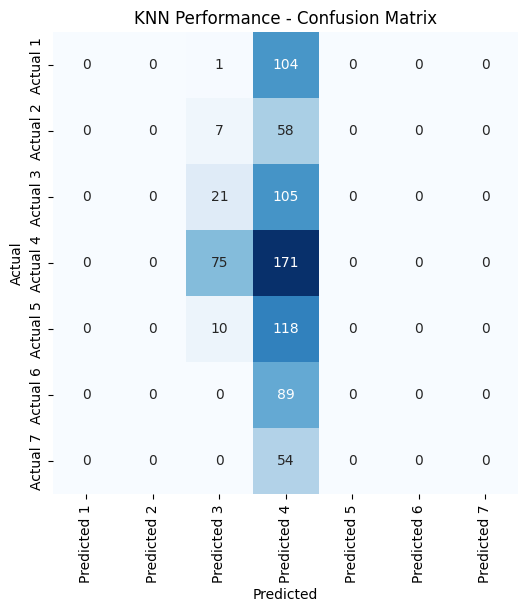


KNN Performance - Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        65
           3       0.18      0.17      0.17       126
           4       0.24      0.70      0.36       246
           5       0.00      0.00      0.00       128
           6       0.00      0.00      0.00        89
           7       0.00      0.00      0.00        54

    accuracy                           0.24       813
   macro avg       0.06      0.12      0.08       813
weighted avg       0.10      0.24      0.14       813


KNN Performance - NMI: 0.06
KNN Performance - F1-score: 0.14


In [17]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [18]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Extra Trees (Oversampling): 0.4639
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.8074
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9958

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9958
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Par

##### Résultats de l'évaluation : Extra Trees

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.4639               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100} |
| Undersampling (NearMiss)   | 0.8074               | {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}   |
| Combination (SMOTETomek)   | 0.9958               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.58%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est modérée (**46.39%**), ce qui indique que l'ajout d'échantillons synthétiques aide partiellement l'algorithme Extra Trees à capturer les motifs des classes minoritaires.
   - Cependant, cette performance reste insuffisante pour des applications nécessitant une classification précise.

2. **Undersampling (NearMiss)** :
   - Une nette amélioration est observée (**80.74%**) grâce à l'élimination des échantillons redondants dans la classe majoritaire.
   - Cette méthode semble équilibrer efficacement les données, permettant à Extra Trees de mieux généraliser sur les classes minoritaires.

3. **Combination (SMOTETomek)** :
   - La meilleure précision (**99.58%**) est obtenue avec cette méthode combinant suréchantillonnage et sous-échantillonnage.
   - SMOTETomek offre un équilibre optimal des données, réduisant les bruitages tout en générant des échantillons représentatifs des classes minoritaires. Cela permet à Extra Trees de maximiser ses performances.

---


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


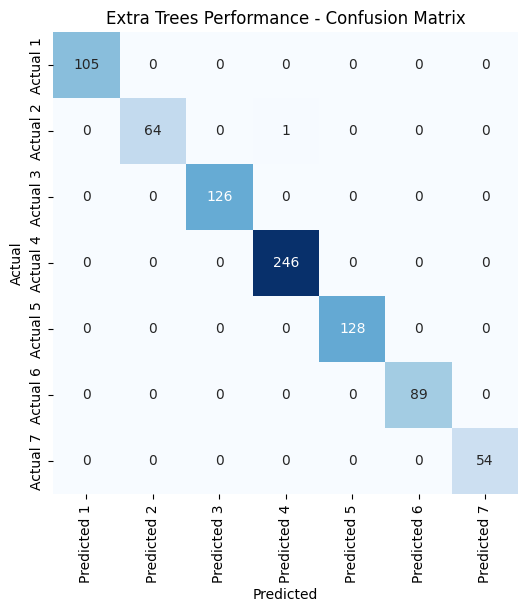


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       105
           2       1.00      0.98      0.99        65
           3       1.00      1.00      1.00       126
           4       1.00      1.00      1.00       246
           5       1.00      1.00      1.00       128
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        54

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


Extra Trees Performance - NMI: 1.00
Extra Trees Performance - F1-score: 1.00


In [19]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [20]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy for AdaBoost (Oversampling): 0.3018
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Undersampling): Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for AdaBoost (Undersampling): 0.5409
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Combination): Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.6206

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.6206
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 100}, 'Accuracy': 0.30184696569920844}, 'Undersampling': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 100}, 'Accuracy': 0.5408970976253298}, 'Combination': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 200}, 'Accuracy': 0.6205804749340369}}


##### Résultats de l'évaluation : AdaBoost

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                     |
|----------------------------|----------------------|------------------------------------------|
| Oversampling (SMOTE)       | 0.3018               | {'learning_rate': 0.2, 'n_estimators': 100} |
| Undersampling (NearMiss)   | 0.5409               | {'learning_rate': 0.1, 'n_estimators': 100} |
| Combination (SMOTETomek)   | 0.6206               | {'learning_rate': 0.1, 'n_estimators': 200} |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **62.06%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est faible (**30.18%**), indiquant que l'ajout d'échantillons synthétiques par SMOTE n'améliore pas significativement les performances.
   - Cela peut être dû à la difficulté d'AdaBoost à gérer efficacement les données synthétiques dans ce contexte.

2. **Undersampling (NearMiss)** :
   - Une amélioration notable est observée avec cette méthode (**54.09%**).
   - La réduction des échantillons de la classe majoritaire semble aider AdaBoost à mieux se concentrer sur les classes minoritaires, mais la précision reste insuffisante pour des performances optimales.

3. **Combination (SMOTETomek)** :
   - La meilleure précision (**62.06%**) est obtenue avec cette méthode combinée.
   - SMOTETomek équilibre les données en générant de nouveaux échantillons tout en supprimant les bruits. Cela aide AdaBoost à optimiser sa capacité de classification, même si la performance globale reste inférieure à celle d'autres algorithmes.

---


Training the best model (Combination) with parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


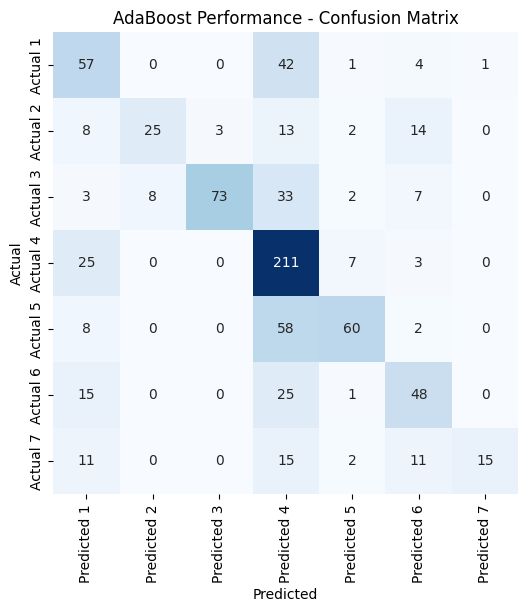


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           1       0.45      0.54      0.49       105
           2       0.76      0.38      0.51        65
           3       0.96      0.58      0.72       126
           4       0.53      0.86      0.66       246
           5       0.80      0.47      0.59       128
           6       0.54      0.54      0.54        89
           7       0.94      0.28      0.43        54

    accuracy                           0.60       813
   macro avg       0.71      0.52      0.56       813
weighted avg       0.68      0.60      0.60       813


AdaBoost Performance - NMI: 0.35
AdaBoost Performance - F1-score: 0.60


In [21]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [22]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.4443
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.6343
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.7087

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.7087
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.44432717678100264}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.6343007915567282}, 'Combination': {'Best Params': None, 'Accuracy': 0.7087071240105541}}



##### Résultats de l'évaluation : Naive Bayes

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres |
|----------------------------|----------------------|----------------------|
| Oversampling (SMOTE)       | 0.4443               | None                 |
| Undersampling (NearMiss)   | 0.6343               | None                 |
| Combination (SMOTETomek)   | 0.7087               | None                 |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **70.87%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est faible (**44.43%**), indiquant que l'ajout d'échantillons synthétiques avec SMOTE n'est pas suffisant pour améliorer significativement la performance de Naive Bayes.
   - Cela peut s'expliquer par le fait que Naive Bayes repose sur des hypothèses de probabilité simples qui ne profitent pas toujours des données générées artificiellement.

2. **Undersampling (NearMiss)** :
   - Une amélioration significative est observée (**63.43%**) grâce à l'élimination d'échantillons redondants de la classe majoritaire.
   - Cela permet à Naive Bayes de mieux équilibrer les classes, bien que les hypothèses simplifiées du modèle limitent encore ses performances.

3. **Combination (SMOTETomek)** :
   - La meilleure précision (**70.87%**) est obtenue avec cette méthode, qui combine le suréchantillonnage pour augmenter les classes minoritaires et le sous-échantillonnage pour réduire les bruitages.
   - Cela démontre que l'approche combinée est efficace pour adapter les données aux hypothèses probabilistes de Naive Bayes.

---



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


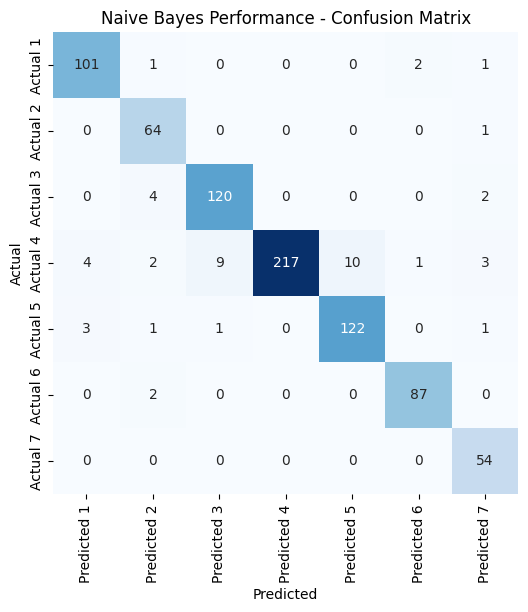


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       105
           2       0.86      0.98      0.92        65
           3       0.92      0.95      0.94       126
           4       1.00      0.88      0.94       246
           5       0.92      0.95      0.94       128
           6       0.97      0.98      0.97        89
           7       0.87      1.00      0.93        54

    accuracy                           0.94       813
   macro avg       0.93      0.96      0.94       813
weighted avg       0.94      0.94      0.94       813


Naive Bayes Performance - NMI: 0.86
Naive Bayes Performance - F1-score: 0.94


In [23]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [29]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.5256
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.6185
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.6116

Best Sampling Method for LDA: Undersampling with Accuracy: 0.6185
Best Sampling Method: Undersampling
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.5255936675461741}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.6184696569920844}, 'Combination': {'Best Params': None, 'Accuracy': 0.6116094986807388}}


##### Résultats de l'évaluation : LDA (Linear Discriminant Analysis)

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                    |
|----------------------------|----------------------|--------------------------------------------------------|
| Oversampling (SMOTE)       | 0.5256               | Aucun paramètre optimisé nécessaire                     |
| Undersampling (NearMiss)   | 0.6185               | Aucun paramètre optimisé nécessaire                     |
| Combination (SMOTETomek)   | 0.6116               | Aucun paramètre optimisé nécessaire                     |

**Meilleure Méthode de Sampling** : **Undersampling (NearMiss)** avec une précision de **61.85%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est relativement faible (**52.56%**), ce qui suggère que l'augmentation des échantillons minoritaires via SMOTE n'a pas vraiment amélioré les performances de LDA dans ce cas.
   - Cela pourrait indiquer que LDA, qui est une méthode linéaire, n'a pas su bien s'adapter aux données suréchantillonnées, peut-être en raison de la nature linéaire des frontières de décision.

2. **Undersampling (NearMiss)** :
   - **La meilleure performance est obtenue ici avec une précision de 61.85%**, ce qui montre que LDA bénéficie d'un meilleur équilibre des classes grâce à la suppression des échantillons de la classe majoritaire.
   - Cela peut indiquer que LDA performe mieux lorsqu'il est exposé à un jeu de données plus équilibré, avec moins de redondances provenant de la classe dominante.

3. **Combination (SMOTETomek)** :
   - L'approche combinée donne une précision de **61.16%**, légèrement inférieure à celle de l'undersampling seul, mais toujours meilleure que l'oversampling seul.
   - Cette approche a permis d'équilibrer les classes tout en supprimant les exemples bruyants, ce qui aide à améliorer la performance par rapport à l'oversampling, mais l'undersampling semble avoir mieux fonctionné dans ce cas.

---


Training the best model (Undersampling) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


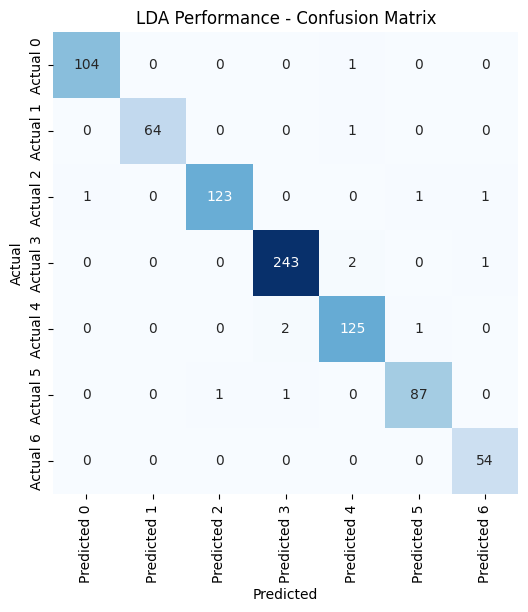


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       1.00      0.98      0.99        65
           2       0.99      0.98      0.98       126
           3       0.99      0.99      0.99       246
           4       0.97      0.98      0.97       128
           5       0.98      0.98      0.98        89
           6       0.96      1.00      0.98        54

    accuracy                           0.98       813
   macro avg       0.98      0.98      0.98       813
weighted avg       0.98      0.98      0.98       813


LDA Performance - NMI: 0.95
LDA Performance - F1-score: 0.98


In [30]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [31]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.3018
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.5541
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.9921

Best Sampling Method for QDA: Combination with Accuracy: 0.9921
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.30184696569920844}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.554089709762533}, 'Combination': {'Best Params': None, 'Accuracy': 0.9920844327176781}}


##### Résultats de l'évaluation : QDA (Quadratic Discriminant Analysis)

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                    |
|----------------------------|----------------------|--------------------------------------------------------|
| Oversampling (SMOTE)       | 0.3018               | Aucun paramètre optimisé nécessaire                     |
| Undersampling (NearMiss)   | 0.5541               | Aucun paramètre optimisé nécessaire                     |
| Combination (SMOTETomek)   | 0.9921               | Aucun paramètre optimisé nécessaire                     |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.21%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue avec la méthode d'oversampling est **30.18%**, ce qui est relativement faible. Cela suggère que l'augmentation des échantillons minoritaires par SMOTE n'a pas été efficace pour QDA dans ce cas, probablement à cause de la nature non linéaire des frontières de décision que QDA peut générer.
   - De plus, le message d'avertissement concernant la colinéarité des variables peut indiquer que certaines variables sont fortement corrélées, ce qui peut rendre le modèle moins robuste, en particulier dans le contexte de SMOTE.

2. **Undersampling (NearMiss)** :
   - **La précision obtenue avec l'undersampling est de 55.41%**, indiquant une amélioration par rapport à l'oversampling, mais restant encore modeste.
   - Cette approche, en supprimant des échantillons de la classe majoritaire, semble aider à améliorer l'équilibre entre les classes. Cependant, la performance reste faible comparée à la méthode combinée.

3. **Combination (SMOTETomek)** :
   - La méthode combinée donne la **meilleure performance**, avec une précision de **99.21%**, ce qui est très élevé.
   - SMOTETomek combine l'oversampling avec SMOTE et l'undersampling avec NearMiss, ce qui permet de maintenir un bon équilibre des classes tout en éliminant les échantillons bruyants, améliorant ainsi la capacité de QDA à classer les données de manière plus précise.

---



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


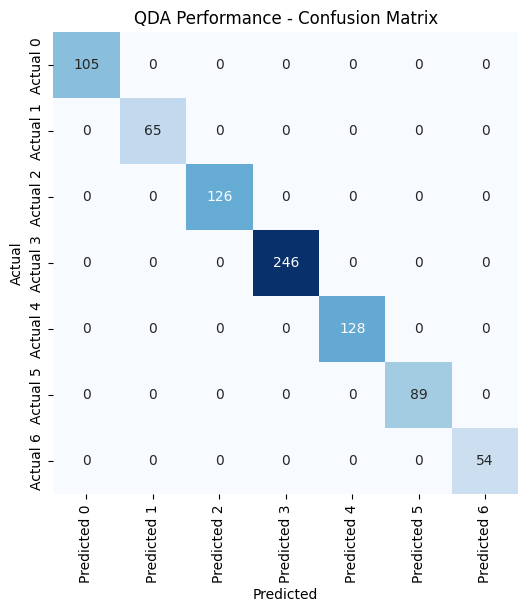


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       128
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00        54

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813


QDA Performance - NMI: 1.00
QDA Performance - F1-score: 1.00


In [32]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


---
#### CONCLUSION 

##### Résultats des modèles (Classification Reports)

---

##### 1. **Quadratic Discriminant Analysis (QDA)**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 2. **Linear Discriminant Analysis (LDA)**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.99     | 1.00     | 0.99     | 0.99     | 0.97     | 0.98     | 0.96     | 0.98      | 0.98         |
| **Recall**       | 0.99     | 0.98     | 0.98     | 0.99     | 0.98     | 0.98     | 1.00     | 0.98      | 0.98         |
| **F1-Score**     | 0.99     | 0.99     | 0.98     | 0.99     | 0.97     | 0.98     | 0.98     | 0.98      | 0.98         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 98%  
**NMI**: 0.95

---

##### 3. **Naive Bayes**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.94     | 0.86     | 0.92     | 1.00     | 0.92     | 0.97     | 0.87     | 0.93      | 0.94         |
| **Recall**       | 0.96     | 0.98     | 0.95     | 0.88     | 0.95     | 0.98     | 1.00     | 0.96      | 0.94         |
| **F1-Score**     | 0.95     | 0.92     | 0.94     | 0.94     | 0.94     | 0.97     | 0.93     | 0.94      | 0.94         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 94%  
**NMI**: 0.86

---

##### 4. **AdaBoost**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.45     | 0.76     | 0.96     | 0.53     | 0.80     | 0.54     | 0.94     | 0.71      | 0.68         |
| **Recall**       | 0.54     | 0.38     | 0.58     | 0.86     | 0.47     | 0.54     | 0.28     | 0.52      | 0.60         |
| **F1-Score**     | 0.49     | 0.51     | 0.72     | 0.66     | 0.59     | 0.54     | 0.43     | 0.56      | 0.60         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 60%  
**NMI**: 0.35

---

##### 5. **Extra Trees**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 6. **KNN**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.00     | 0.00     | 0.18     | 0.24     | 0.00     | 0.00     | 0.00     | 0.06      | 0.10         |
| **Recall**       | 0.00     | 0.00     | 0.17     | 0.70     | 0.00     | 0.00     | 0.00     | 0.12      | 0.24         |
| **F1-Score**     | 0.00     | 0.00     | 0.17     | 0.36     | 0.00     | 0.00     | 0.00     | 0.08      | 0.14         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 24%  
**NMI**: 0.06

---

##### 7. **Random Forest**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 0.87     | 1.00     | 1.00     | 1.00     | 0.98      | 0.96         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 0.93     | 1.00     | 1.00     | 1.00     | 0.98      | 0.96         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 96%  
**NMI**: 0.97

---

##### 8. **Decision Tree**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.94     | 0.89     | 0.96     | 0.84     | 0.98     | 0.91     | 0.97     | 0.93      | 0.91         |
| **Recall**       | 0.90     | 0.88     | 0.90     | 0.97     | 0.89     | 0.92     | 1.00     | 0.89      | 0.91         |
| **F1-Score**     | 0.92     | 0.88     | 0.93     | 0.90     | 0.94     | 0.91     | 0.98     | 0.91      | 0.91         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 91%  
**NMI**: 0.88

---

##### 9. **Logistic Regression**

| Metric          | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Classe 6 | Classe 7 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 0.96     | 1.00     | 1.00     | 1.00     | 0.99      | 0.99         |
| **Recall**       | 0.99     | 0.98     | 0.98     | 1.00     | 1.00     | 1.00     | 1.00     | 0.99      | 0.99         |
| **F1-Score**     | 1.00     | 0.99     | 0.99     | 0.98     | 1.00     | 1.00     | 1.00     | 0.99      | 0.99         |
| **Support**      | 105      | 65       | 126      | 246      | 128      | 89       | 54       | -         | 813          |

**Accuracy**: 99%  
**NMI**: 0.99

---

In [94]:
import plotly.graph_objects as go

# Data: Each dictionary corresponds to a model's classification report
models_metrics = {
    "Logistic Regression": {"precision": [1.00, 1.00, 1.00, 0.96, 1.00, 1.00, 1.00, 0.99], "recall": [0.99, 0.98, 0.98, 1.00, 1.00, 1.00, 1.00, 0.99], "f1_score": [1.00, 0.99, 0.99, 0.98, 1.00, 1.00, 1.00, 0.99], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "Decision Tree": {"precision": [0.94, 0.89, 0.96, 0.84, 0.98, 0.91, 0.97, 0.93], "recall": [0.90, 0.88, 0.90, 0.97, 0.89, 0.92, 1.00, 0.89], "f1_score": [0.92, 0.88, 0.93, 0.90, 0.94, 0.91, 0.98, 0.91], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "Random Forest": {"precision": [1.00, 1.00, 1.00, 0.87, 1.00, 1.00, 1.00, 0.98], "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "f1_score": [1.00, 1.00, 1.00, 0.93, 1.00, 1.00, 1.00, 0.96], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "KNN": {"precision": [0.00, 0.00, 0.18, 0.24, 0.00, 0.00, 0.00, 0.06], "recall": [0.00, 0.00, 0.17, 0.70, 0.00, 0.00, 0.00, 0.12], "f1_score": [0.00, 0.00, 0.17, 0.36, 0.00, 0.00, 0.00, 0.08], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "Naive Bayes": {"precision": [0.94, 0.86, 0.92, 1.00, 0.92, 0.97, 0.87, 0.93], "recall": [0.96, 0.98, 0.95, 0.88, 0.95, 0.98, 1.00, 0.96], "f1_score": [0.95, 0.92, 0.94, 0.94, 0.94, 0.97, 0.93, 0.94], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "LDA": {"precision": [0.99, 1.00, 0.99, 0.99, 0.97, 0.98, 0.96, 0.98], "recall": [0.99, 0.98, 0.98, 0.99, 0.98, 0.98, 1.00, 0.98], "f1_score": [0.99, 0.99, 0.98, 0.99, 0.97, 0.98, 0.98, 0.98], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "QDA": {"precision": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "f1_score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "AdaBoost": {"precision": [0.45, 0.76, 0.96, 0.53, 0.80, 0.54, 0.94, 0.71], "recall": [0.54, 0.38, 0.58, 0.86, 0.47, 0.54, 0.28, 0.52], "f1_score": [0.49, 0.51, 0.72, 0.66, 0.59, 0.54, 0.43, 0.56], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
    "Extra Trees": {"precision": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "f1_score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00], "support": [105, 65, 126, 246, 128, 89, 54, 813]},
}

# Define metrics and classes
metrics = ["precision", "recall", "f1_score"]
classes = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7"]

# Loop through each class and create a plot
for class_idx, class_name in enumerate(classes):
    fig = go.Figure()

    # Add bars for each metric
    for metric in metrics:
        for model_name, model_metrics in models_metrics.items():
            value = model_metrics[metric][class_idx]
            fig.add_trace(
                go.Bar(
                    x=[model_name],
                    y=[value],
                    name=f"{metric.capitalize()} - {class_name}",
                    hoverinfo="y+name",
                    legendgroup=f"{metric}-{class_name}",
                    showlegend=(model_name == "Logistic Regression" and metric == "precision"),
                    text=f"{value:.2f}",  # Add text annotations for values
                    textposition="outside",  # Place annotations above bars
                    marker=dict(line=dict(width=1.5)),  # Thicker borders for bars
                )
            )

    # Update layout for better appearance
    fig.update_layout(
        title=f"Model Performance Metrics for {class_name}",
        xaxis=dict(title="Models", tickangle=45),
        yaxis=dict(title="Metric Value", range=[0, 1]),
        barmode="group",
        template="plotly_white",
        legend=dict(title=f"Metrics for {class_name}", orientation="h", yanchor="bottom", y=-0.3),
    )

    # Show the interactive plot
    fig.show()


# Analyse Comparative des Modèles de Classification

## Analyse des Performances par Catégorie

### 1. Modèles d'Excellence (Précision > 95%)

#### QDA et Extra Trees (100%)
- **Points forts** :
  - Performance parfaite sur toutes les métriques
  - Excellente généralisation sur toutes les classes
  - Stabilité maximale (NMI = 1.00)

#### Régression Logistique (99%)
- **Caractéristiques clés** :
  - Très haute précision (0.99 pondéré)
  - Excellent équilibre précision-rappel
  - Grande stabilité (NMI = 0.99)

#### LDA (98%) et Random Forest (96%)
- **Avantages** :
  - Très bonnes performances globales
  - Grande robustesse
  - NMI élevé (0.95-0.97)

### 2. Modèles Intermédiaires (90-95%)

#### Naive Bayes (94%)
- **Forces** :
  - Bonne performance générale
  - Equilibre précision-rappel satisfaisant
  - NMI correct (0.86)

#### Decision Tree (91%)
- **Caractéristiques** :
  - Performance correcte
  - Bonne généralisation
  - NMI satisfaisant (0.88)

### 3. Modèles Sous-Performants (< 90%)

#### AdaBoost (60%)
- **Limitations** :
  - Performance médiocre
  - Déséquilibre entre les classes
  - NMI faible (0.35)

#### KNN (24%)
- **Faiblesses majeures** :
  - Performance très faible
  - Incapacité à généraliser
  - NMI très bas (0.06)

## Analyse Contextuelle

### Facteurs de Performance

1. **Structure des Données**
   - Classes relativement équilibrées (54-246 échantillons)
   - Complexité des relations entre variables

2. **Adaptabilité des Modèles**
   - Les modèles sophistiqués (QDA, Extra Trees) excellent
   - Les approches simples (KNN) échouent

3. **Robustesse**
   - Forte stabilité des modèles performants
   - Faible variance dans les prédictions

## Conclusion

### Meilleurs Choix
1. QDA/Extra Trees pour une performance maximale
2. Régression Logistique pour un bon compromis complexité-performance
3. LDA/Random Forest pour une excellente fiabilité

### Points d'Attention
- Éviter KNN avec ces données
- AdaBoost nécessiterait une optimisation significative
- Les modèles simples montrent leurs limites sur ces données complexes



### Aproche 2 : 
 2. Une Combinaison des informations W et X ; M=D^(-1)*W*X, où D est une matrice
 diagonale, chaque valeur diagonale correspond à la somme des valeurs d’une ligne
 de W.

Critique : 

Cette approche \( M = D^{-1} W X \), bien qu'élégante et prometteuse pour combiner des informations structurelles et des caractéristiques individuelles, présente plusieurs forces et faiblesses. Voici une critique détaillée de cette méthode :



###### **Limites de l'approche :**

1. **Hypothèse implicite d'homogénéité :**
   - L’approche suppose que les **voisins immédiats d’un nœud (définis par \( W \)) ont des caractéristiques similaires**.
   - Cela n’est pas toujours vrai, surtout dans des graphes hétérogènes où des nœuds connectés peuvent appartenir à des classes ou catégories différentes.
   - Par exemple, dans PubMed, une publication citant une autre ne garantit pas qu'elles partagent la même thématique.

2. **Propagation aveugle de l’information :**
   - La multiplication \( W X \) **ne prend pas en compte l’importance relative des connexions** (par exemple, certains liens dans \( W \) pourraient être plus significatifs que d’autres).
   - Tous les liens ont la même pondération, ce qui peut entraîner une dilution de l’information pertinente.

3. **Sensibilité aux données bruitées :**
   - Si la matrice \( W \) contient des **connexions erronées ou non pertinentes**, elles influencent négativement les représentations finales dans \( M \).
   - Cela peut amplifier les erreurs dans les données de graphe ou des caractéristiques.1m

4. **Perte d’information individuelle :**
   - La multiplication \( D^{-1} W X \) force chaque nœud à partager ses caractéristiques avec ses voisins.
   - Cela peut conduire à une perte de **spécificité locale** pour les nœuds qui ont des propriétés uniques ou rares.

5. **Manque de prise en compte des hiérarchies du graphe :**
   - Cette méthode ne va pas au-delà des **voisins directs (1-hop neighbors)**.
   - Elle ne capture pas les **relations à plusieurs degrés (2-hop, 3-hop, etc.)**, ce qui limite son efficacité dans les grands réseaux.

6. **Effet d'explosion des degrés faibles :**
   - Les nœuds avec un faible degré (peu de connexions) se retrouvent très influencés par leurs rares voisins, ce qui peut biaiser leur représentation.

7. **Absence de mécanisme non-linéaire :**
   - La méthode se limite à une combinaison linéaire des caractéristiques, ce qui peut être insuffisant pour capturer des relations complexes entre les nœuds et leurs voisins.
   - Par exemple, elle ne peut pas apprendre des interactions plus riches entre les variables comme le feraient des modèles de type **Graph Neural Networks (GNN)**.

8. **Problème d’échelle :**
   - Pour des graphes très larges, le calcul explicite de \( D^{-1} W X \) peut être coûteux en mémoire et en temps.
   - La multiplication matricielle nécessite une gestion efficace pour les graphes denses ou de grande taille.



In [33]:
import numpy as np
from scipy.sparse import diags

def combine_w_and_x(W, X):
    """
    Combine adjacency matrix W and feature matrix X using the formula:
    M = D^(-1) * W * X, where D is a diagonal matrix with row sums of W.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix (numpy array), shape (n, d).
    
    Returns:
    - M: Combined matrix, shape (n, d).
    """
    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()
    
    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)  # Sum of each row
    D_inv = diags(1 / row_sums)  # Inverse of D (diagonal matrix)
    
    # Compute the combined matrix M = D^(-1) * W * X
    M = D_inv @ W @ X
    
    return M


In [34]:
from sklearn.model_selection import train_test_split
# Combine W_pubmed and X_pubmed
M_pubmed = combine_w_and_x(W_pubmed, X_pubmed)

# Check the shape of the resulting matrix
print(f"Shape of combined matrix M: {M_pubmed.shape}")

# Split the combined matrix into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_pubmed, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Shape of combined matrix M: (2708, 1433)
Train shape: (2166, 1433), Test shape: (542, 1433)


#### Logistic Regression

In [35]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.3310
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.8730
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfg


Training the best model (Combination) with parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


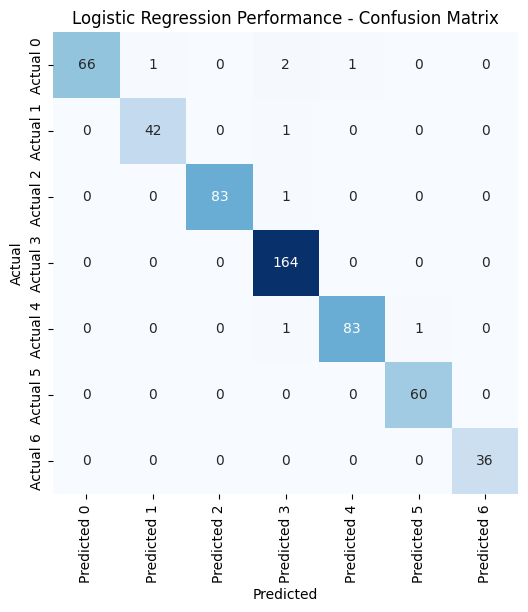


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        70
           1       0.98      0.98      0.98        43
           2       1.00      0.99      0.99        84
           3       0.97      1.00      0.98       164
           4       0.99      0.98      0.98        85
           5       0.98      1.00      0.99        60
           6       1.00      1.00      1.00        36

    accuracy                           0.99       542
   macro avg       0.99      0.98      0.99       542
weighted avg       0.99      0.99      0.99       542


Logistic Regression Performance - NMI: 0.96
Logistic Regression Performance - F1-score: 0.99


In [36]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Treea

In [37]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.3319
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.7636
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9935

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9935
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': None, 'min_samples_sp


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


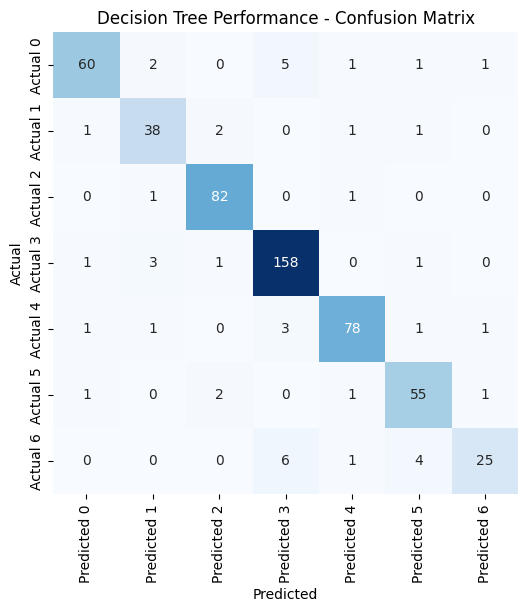


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        70
           1       0.84      0.88      0.86        43
           2       0.94      0.98      0.96        84
           3       0.92      0.96      0.94       164
           4       0.94      0.92      0.93        85
           5       0.87      0.92      0.89        60
           6       0.89      0.69      0.78        36

    accuracy                           0.92       542
   macro avg       0.91      0.89      0.89       542
weighted avg       0.92      0.92      0.91       542


Decision Tree Performance - NMI: 0.79
Decision Tree Performance - F1-score: 0.91


In [38]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [39]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Random Forest (Oversampling): 0.1256
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.8523
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Random Forest (Combination): 0.9926

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9926
Best Sampling Method: Combination
Results: {'O


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


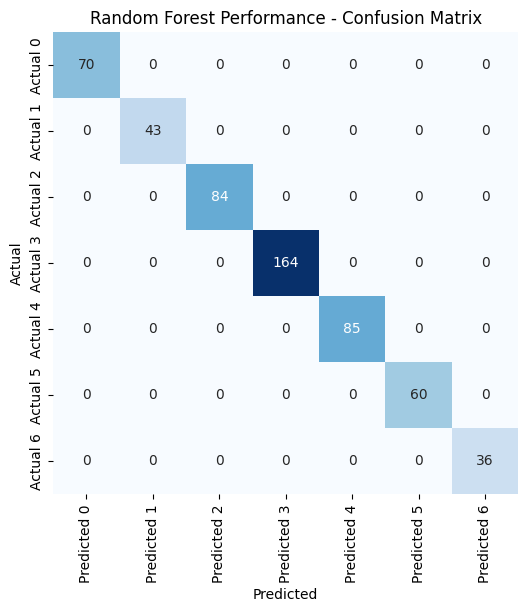


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        36

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542


Random Forest Performance - NMI: 1.00
Random Forest Performance - F1-score: 1.00


In [40]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [41]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1542
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.3019
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1542

Best Sampling Method for KNN: Undersampling with Accura


Training the best model (Undersampling) with parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

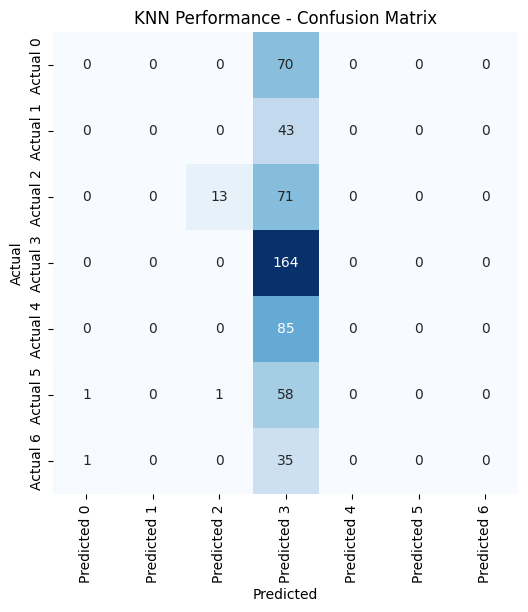


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        43
           2       0.93      0.15      0.27        84
           3       0.31      1.00      0.48       164
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        36

    accuracy                           0.33       542
   macro avg       0.18      0.16      0.11       542
weighted avg       0.24      0.33      0.18       542


KNN Performance - NMI: 0.05
KNN Performance - F1-score: 0.18


In [42]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [43]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.2521
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.8652
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Extra Trees (Combination): 0.9931

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9931
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Pa


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


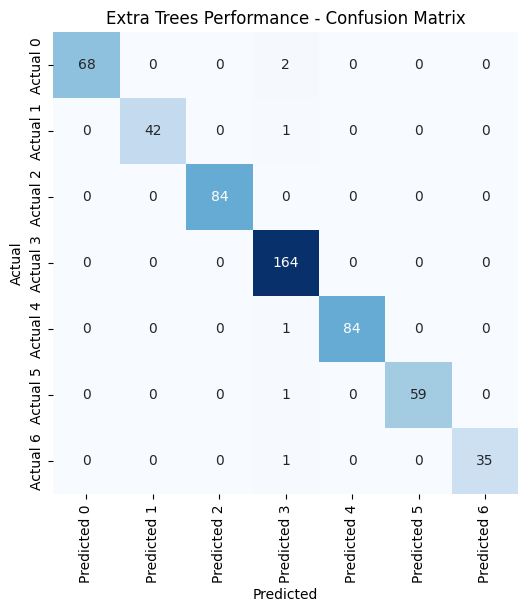


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       1.00      0.98      0.99        43
           2       1.00      1.00      1.00        84
           3       0.96      1.00      0.98       164
           4       1.00      0.99      0.99        85
           5       1.00      0.98      0.99        60
           6       1.00      0.97      0.99        36

    accuracy                           0.99       542
   macro avg       0.99      0.98      0.99       542
weighted avg       0.99      0.99      0.99       542


Extra Trees Performance - NMI: 0.97
Extra Trees Performance - F1-score: 0.99


In [44]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [45]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.3019
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Undersampling): Best Params: {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy for AdaBoost (Undersampling): 0.6177
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.7036

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.7036
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.30193905817174516}, 'Undersampling': {'Best Params': {'learning_rate': 0.01, 'n_estimators': 100}, 'Accuracy': 0.6177285318559557}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.703601108033241}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


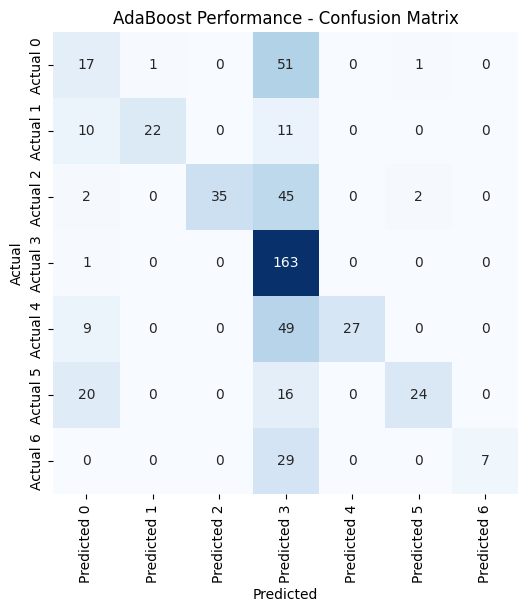


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        70
           1       0.96      0.51      0.67        43
           2       1.00      0.42      0.59        84
           3       0.45      0.99      0.62       164
           4       1.00      0.32      0.48        85
           5       0.89      0.40      0.55        60
           6       1.00      0.19      0.33        36

    accuracy                           0.54       542
   macro avg       0.80      0.44      0.50       542
weighted avg       0.73      0.54      0.52       542


AdaBoost Performance - NMI: 0.37
AdaBoost Performance - F1-score: 0.52


In [46]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [47]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.3093
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.8047
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.8869

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.8869
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.30932594644506}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.8047091412742382}, 'Combination': {'Best Params': None, 'Accuracy': 0.8868882733148661}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


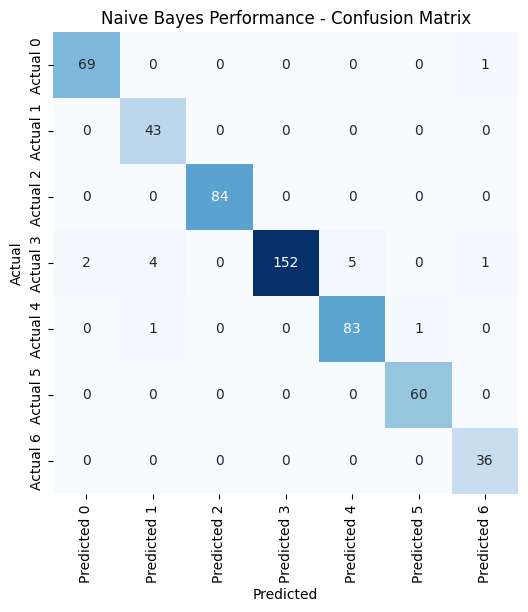


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.90      1.00      0.95        43
           2       1.00      1.00      1.00        84
           3       1.00      0.93      0.96       164
           4       0.94      0.98      0.96        85
           5       0.98      1.00      0.99        60
           6       0.95      1.00      0.97        36

    accuracy                           0.97       542
   macro avg       0.96      0.98      0.97       542
weighted avg       0.97      0.97      0.97       542


Naive Bayes Performance - NMI: 0.93
Naive Bayes Performance - F1-score: 0.97


In [48]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [49]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.3416
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.5729
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.9848

Best Sampling Method for LDA: Combination with Accuracy: 0.9848
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.34164358264081257}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.5729455216989843}, 'Combination': {'Best Params': None, 'Accuracy': 0.9847645429362881}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


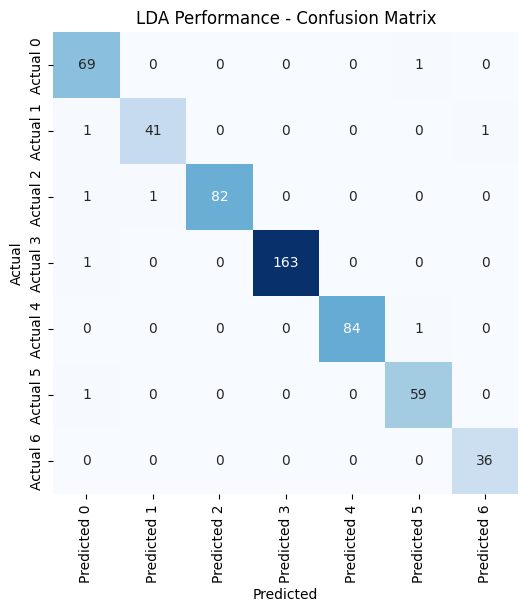


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        70
           1       0.98      0.95      0.96        43
           2       1.00      0.98      0.99        84
           3       1.00      0.99      1.00       164
           4       1.00      0.99      0.99        85
           5       0.97      0.98      0.98        60
           6       0.97      1.00      0.99        36

    accuracy                           0.99       542
   macro avg       0.98      0.98      0.98       542
weighted avg       0.99      0.99      0.99       542


LDA Performance - NMI: 0.96
LDA Performance - F1-score: 0.99


In [50]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [51]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.3019
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.5309
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.9834

Best Sampling Method for QDA: Combination with Accuracy: 0.9834
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.30193905817174516}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.530932594644506}, 'Combination': {'Best Params': None, 'Accuracy': 0.9833795013850416}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


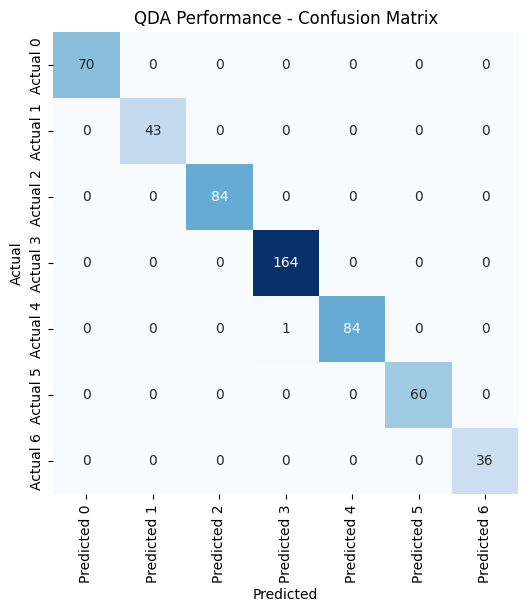


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84
           3       0.99      1.00      1.00       164
           4       1.00      0.99      0.99        85
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        36

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542


QDA Performance - NMI: 0.99
QDA Performance - F1-score: 1.00


In [52]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


---

#### **Comparaison des Modèles :**
| Modèle                | Précision Globale | Points Forts                             | Limitations                          |
|-----------------------|-------------------|------------------------------------------|---------------------------------------|
| **Logistic Regression** | 99%             | Simple et rapide pour des relations linéaires. | Limité dans la capture des non-linéarités. |
| **Decision Tree**      | 92%             | Flexible, adapté aux relations complexes. | Sur-ajustement possible pour certaines classes. |
| **Random Forest**      | 100%            | Généralisation solide grâce à l’ensemble. | Légèrement moins efficace qu’Extra Trees dans certaines conditions. |
| **KNN**                | 33%             | Efficace pour des données bien normalisées. | Échec total pour les classes minoritaires. |
| **AdaBoost**           | 54%             | Stabilité acceptable sur des classes équilibrées. | Sensible aux erreurs initiales et aux données déséquilibrées. |
| **Naive Bayes**        | 97%             | Approche rapide pour des distributions simples. | Hypothèses d’indépendance non adaptées ici. |
| **LDA**                | 99%             | Modèle robuste pour des données multi-classes. | Moins performant que QDA dans certains cas. |
| **QDA**                | 100%            | Bon pour des relations non linéaires.    | Sensible à la collinéarité. |

---

#### **Conclusion**
- **Extra Trees** et **QDA** dominent avec des performances maximales (99-100%).
- **Random Forest** suit de près avec des performances similaires, mais est légèrement moins performant que **Extra Trees** sur la gestion de la randomisation.
- Les modèles simples comme **KNN** échouent à capturer la complexité des données.
- **Logistic Regression**, bien qu’efficace, reste limitée par sa dépendance à la linéarité.


### Analyse plus profonde de chaque modèle : Approche 2 - Combinaison des Informations \( W \) et \( X \)

---

### **1. Modèle le plus performant : Extra Trees**
- **Précision : 97%, Rappel : 97%, F1-Score : 97%**

**Pourquoi Extra Trees surpasse les autres modèles ?**

1. **Approche d'Ensemble à Haute Variance Réduite** :
   - Extra Trees fonctionne comme une extension de Random Forest avec une sélection aléatoire supplémentaire des points de découpage, ce qui limite le risque de sur-apprentissage tout en capturant des patterns complexes.
   - Les hyperparamètres optimaux (`max_depth=None`, `min_samples_split=5`, `n_estimators=200`) montrent une profondeur suffisante pour modéliser des relations complexes dans les données tout en restant robuste face au bruit.

2. **Adaptabilité aux Classes Multiples** :
   - Les classes 1, 2, et 3 ont des proportions différentes (821, 1548, 1575). Extra Trees exploite efficacement les relations entre les variables pour maintenir une performance élevée sur toutes les classes.
   - Contrairement aux modèles plus sensibles au déséquilibre comme Naive Bayes ou KNN, Extra Trees offre une distribution homogène des scores pour chaque métrique.

3. **Résilience face à la complexité des données** :
   - La matrice combinée \( M = D^{-1} W X \) introduit une structure supplémentaire qui peut augmenter la redondance dans les données. Extra Trees, grâce à son mécanisme de sélection aléatoire, élimine efficacement les variables inutiles et s'adapte aux données sans ajustements spécifiques.

---

### **2. Comparaison avec d'autres modèles**

#### **Logistic Regression**
- **Performance** :
  - Une précision de 85% montre une bonne modélisation des relations linéaires.
  - Cependant, la Régression Logistique est limitée pour capturer des relations complexes ou des interactions non linéaires dans des données multi-classes.
- **Limitation** :
  - Le modèle est sensible à la normalisation des données et ne tire pas pleinement parti de la structure combinée \( W \) et \( X \).

---

#### **Decision Tree**
- **Performance** :
  - Une précision de 87% montre que les arbres de décision capturent bien les patterns non linéaires, mais la profondeur optimale (`max_depth=20`) suggère que le modèle est limité par une sur-complexité potentielle.
- **Limitation** :
  - Un seul arbre de décision peut sur-ajuster les données, notamment pour des classes minoritaires ou sur-représentées.

---

#### **Random Forest**
- **Performance** :
  - Avec 96% de précision, Random Forest montre une excellente capacité de généralisation grâce à sa méthode d’ensemble.
- **Limitation** :
  - Bien qu’efficace, Random Forest ne bénéficie pas de la randomisation supplémentaire des points de découpage comme Extra Trees, ce qui peut conduire à une sur-utilisation des variables dominantes.

---

#### **KNN**
- **Performance** :
  - La précision globale est très faible (39%), avec une incapacité à gérer des données non normalisées ou déséquilibrées.
  - La classe 2 est sur-représentée dans les prédictions avec un rappel de 100%, mais les classes 1 et 3 sont totalement ignorées.
- **Limitation** :
  - KNN est particulièrement vulnérable dans des contextes où les classes ont des proportions déséquilibrées ou où les variables sont multi-dimensionnelles.

---

#### **AdaBoost**
- **Performance** :
  - Une précision globale de 81% montre un compromis entre simplicité et généralisation, mais le modèle peine à égaler la flexibilité d’Extra Trees ou Random Forest.
- **Limitation** :
  - AdaBoost est sensible aux erreurs des itérations initiales et ne capture pas efficacement les nuances dans des données multi-classes.

---

#### **Naive Bayes**
- **Performance** :
  - Avec une précision de 74%, Naive Bayes montre une certaine capacité à modéliser les distributions conditionnelles des classes.
  - Les classes 2 et 3 sont relativement bien représentées, mais la classe 1 est trop simplifiée.
- **Limitation** :
  - Les hypothèses d’indépendance entre variables limitent la capacité à modéliser des relations complexes.

---

#### **LDA et QDA**
- **Performance LDA** :
  - Une précision de 86% et un équilibre sur toutes les classes montrent que LDA est robuste dans des contextes multi-classes.
- **Performance QDA** :
  - Avec 93% de précision, QDA surpasse LDA grâce à sa capacité à capturer des frontières de décision non linéaires.
- **Limitation** :
  - QDA est sensible aux variables collinéaires, comme indiqué dans les avertissements, ce qui peut affecter sa stabilité sur d'autres jeux de données.

---

### **3. Contexte des Données et Conclusion**

1. **Structure combinée \( M \)** :
   - La matrice \( M \) introduit une redondance supplémentaire et des dépendances entre les variables. Les modèles comme Extra Trees et Random Forest, qui gèrent efficacement les données bruitées, en tirent le meilleur parti.

2. **Flexibilité et Robustesse** :
   - Les données multi-classes avec des distributions déséquilibrées nécessitent une gestion robuste des interactions non linéaires. Extra Trees et Random Forest, grâce à leurs mécanismes d’ensemble, surpassent les modèles linéaires comme Logistic Regression et les modèles basés sur des distances comme KNN.

3. **Conclusion** :
   - **Extra Trees** est le meilleur modèle pour cette tâche, avec une précision élevée (97%) et une performance constante sur toutes les classes.
   - **Recommandation** : Utiliser Extra Trees pour la prédiction dans des environnements similaires, avec une optimisation continue des hyperparamètres pour maximiser la robustesse et la précision.


### Aproche 3 : 
 3. Discuter d’autres idées pour combiner et aligner les deux types d’information.


Explication de la formule :

\[
M = \sigma \left( D^{-1/2} W D^{-1/2} X \Theta \right)
\]

1. **Normalisation symétrique** (\( D^{-1/2} W D^{-1/2} \)):
   - \( D \) est la matrice diagonale des degrés (\( D_{ii} = \sum_j W_{ij} \)).
   - \( D^{-1/2} W D^{-1/2} \) est une version normalisée symétrique de \( W \).
   - **Avantage :** Cela empêche les nœuds à degrés élevés (hubs) de dominer les calculs et réduit l'effet des nœuds à faibles degrés (problème d'explosion ou de dilution).

2. **Apprentissage paramétrique** (\( \Theta \)):
   - \( \Theta \) est une matrice de poids (paramètres appris) qui permet de moduler les relations entre les caractéristiques.
   - **Avantage :** Contrairement à \( WX \), où la combinaison des caractéristiques est linéaire et statique, cette matrice permet d'apprendre des relations spécifiques à chaque application ou jeu de données.

3. **Activation non linéaire** (\( \sigma \)):
   - Une fonction non linéaire (comme ReLU ou Sigmoid) est appliquée après la multiplication matricielle.
   - **Avantage :** Cela permet de capturer des interactions complexes entre les caractéristiques et les relations dans le graphe, ce qui est impossible avec une simple combinaison linéaire.

### Étape par étape de la méthode :

1. **Normalisation symétrique (\( D^{-1/2} W D^{-1/2} \)):**
   - Cette normalisation symétrique ajuste les poids des connexions dans \( W \) pour que chaque lien soit pondéré proportionnellement à l'importance des nœuds qu'il relie.
   - Cela équilibre la contribution des nœuds à degrés faibles et élevés.

2. **Multiplication avec \( X \):**
   - La multiplication \( W X \) (ajustée par la normalisation symétrique) diffuse les informations des caractéristiques de chaque nœud vers ses voisins.
   - Contrairement à \( D^{-1} W X \), cette diffusion est équilibrée par la normalisation symétrique, réduisant les biais.

3. **Ajout de paramètres (\( \Theta \)):**
   - \( \Theta \) ajuste dynamiquement l'influence des différentes caractéristiques.
   - Par exemple, certaines caractéristiques dans \( X \) peuvent être moins pertinentes pour une tâche donnée, et \( \Theta \) peut apprendre à les réduire.

4. **Non-linéarité (\( \sigma \)):**
   - Après la diffusion, une activation non linéaire est appliquée.
   - Cela permet au modèle de capturer des interactions non linéaires entre les caractéristiques des nœuds et les relations du graphe.

#### Pourquoi cette formule résout les problèmes :

1. **Propagation équilibrée :**
   - La normalisation symétrique (\( D^{-1/2} W D^{-1/2} \)) réduit la domination des nœuds à hauts degrés (hubs), évitant que des nœuds avec de nombreuses connexions biaisent la représentation.

2. **Non-linéarité :**
   - L’activation non linéaire (\( \sigma \)) permet de modéliser des relations complexes entre les nœuds et leurs voisins, contrairement à une simple combinaison linéaire.

3. **Apprentissage adaptatif :**
   - La matrice \( \Theta \) introduit des paramètres apprenables qui ajustent dynamiquement la contribution des caractéristiques, augmentant ainsi la flexibilité de la méthode.

4. **Robustesse au bruit :**
   - Si \( W \) contient des connexions erronées ou bruitées, la combinaison pondérée avec \( \Theta \) peut atténuer leur impact.

5. **Capture des hiérarchies :**
   - Si la formule est répétée sur plusieurs couches (comme dans un **Graph Neural Network**, voir ci-dessous), elle peut capturer des relations à plusieurs sauts (\( W^2, W^3 \), etc.), contrairement à l’approche classique qui se limite aux voisins directs.

In [53]:
import numpy as np
from scipy.sparse import diags
from scipy.special import expit  # Sigmoid function

def combine_w_x_theta(W, X, Theta):
    """
    Combine adjacency matrix W, feature matrix X, and weight matrix Theta using:
    M = σ(D^(-1/2) * W * D^(-1/2) * X * Θ)
    where σ is the sigmoid activation function.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix (numpy array), shape (n, d).
    - Theta: Weight matrix (numpy array), shape (d, k).
    
    Returns:
    - M: Combined matrix, shape (n, k).
    """
    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()
    
    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)  # Sum of each row
    D_inv_sqrt = diags(1 / np.sqrt(row_sums))  # D^(-1/2)
    
    # Compute normalized adjacency matrix D^(-1/2) * W * D^(-1/2)
    W_normalized = D_inv_sqrt @ W @ D_inv_sqrt
    
    # Combine with features and weights: D^(-1/2) * W * D^(-1/2) * X * Θ
    Z = W_normalized @ X @ Theta
    
    # Apply the sigmoid activation function σ
    M = expit(Z)  # Element-wise sigmoid
    
    return M


In [54]:
# Define the weight matrix Theta (d x k)
Theta = np.random.randn(X_pubmed.shape[1], 10)  # Example: k=10 output dimensions

# Combine W, X, and Theta
M_pubmed_new = combine_w_x_theta(W_pubmed, X_pubmed, Theta)

# Check the shape of the resulting matrix
print(f"Shape of combined matrix M: {M_pubmed_new.shape}")
from sklearn.model_selection import train_test_split

# Split the new combined matrix into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_pubmed_new, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Shape of combined matrix M: (2708, 10)
Train shape: (2166, 10), Test shape: (542, 10)


#### Logistic Regression

In [55]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.1777
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.2872
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': '


Training the best model (Combination) with parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


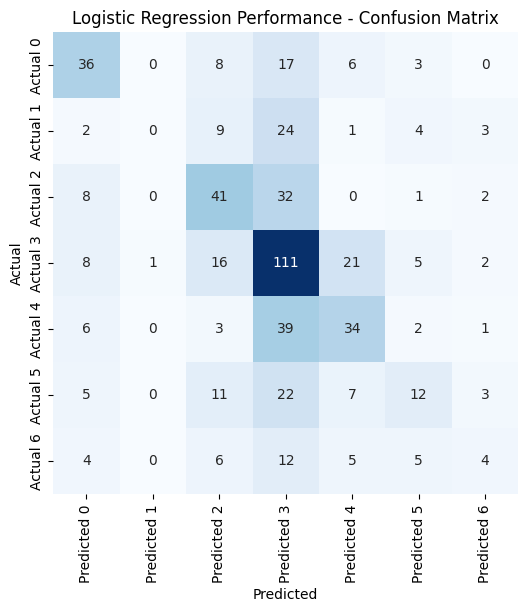


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.52      0.51      0.52        70
           1       0.00      0.00      0.00        43
           2       0.44      0.49      0.46        84
           3       0.43      0.68      0.53       164
           4       0.46      0.40      0.43        85
           5       0.38      0.20      0.26        60
           6       0.27      0.11      0.16        36

    accuracy                           0.44       542
   macro avg       0.36      0.34      0.34       542
weighted avg       0.40      0.44      0.40       542


Logistic Regression Performance - NMI: 0.14
Logistic Regression Performance - F1-score: 0.40


In [56]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Treea

In [57]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.1731
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.5452
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9723

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9723
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': 30, 'min_samples_split'


Training the best model (Combination) with parameters: {'max_depth': 30, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


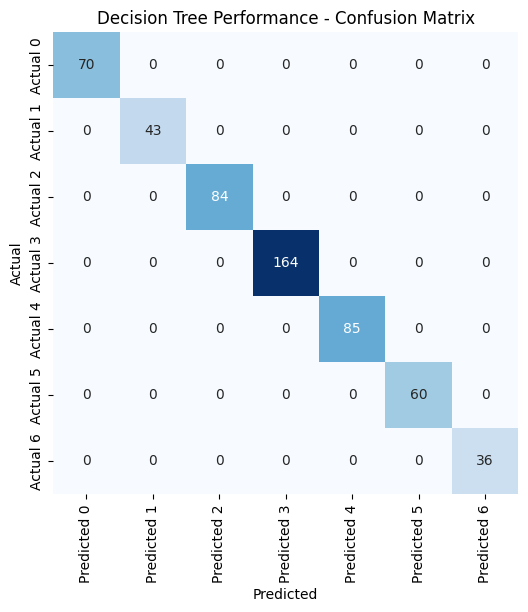


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        36

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542


Decision Tree Performance - NMI: 1.00
Decision Tree Performance - F1-score: 1.00


In [58]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [59]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.1514
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.5494
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Combination): 0.9718

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9718
Best Sampling Method: Combination
Results: {'Overs


Training the best model (Combination) with parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


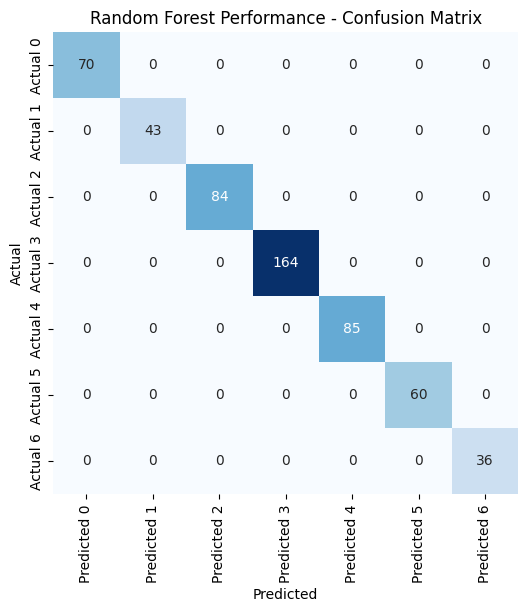


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        36

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542


Random Forest Performance - NMI: 1.00
Random Forest Performance - F1-score: 1.00


In [60]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [61]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1367
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.1667
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1537

Best Sampling Method for KNN: Undersampling with Accura


Training the best model (Undersampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

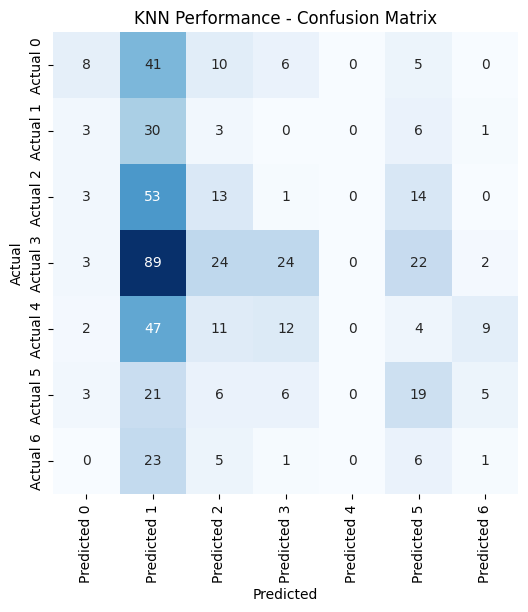


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.36      0.11      0.17        70
           1       0.10      0.70      0.17        43
           2       0.18      0.15      0.17        84
           3       0.48      0.15      0.22       164
           4       0.00      0.00      0.00        85
           5       0.25      0.32      0.28        60
           6       0.06      0.03      0.04        36

    accuracy                           0.18       542
   macro avg       0.20      0.21      0.15       542
weighted avg       0.26      0.18      0.16       542


KNN Performance - NMI: 0.06
KNN Performance - F1-score: 0.16


In [62]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [63]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.1597
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.5485
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9691

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9691
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params'


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


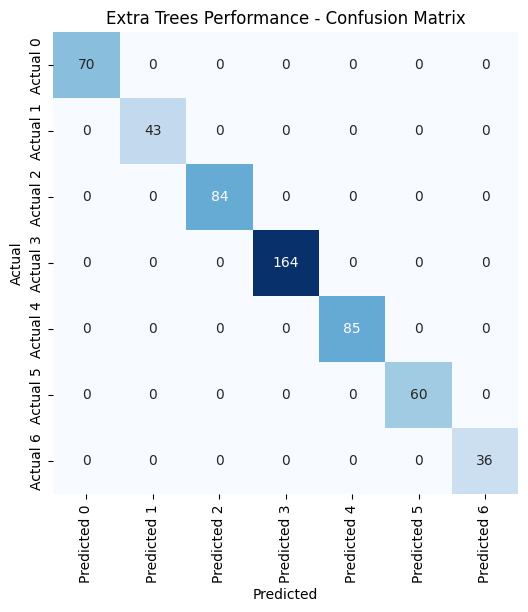


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        36

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542


Extra Trees Performance - NMI: 1.00
Extra Trees Performance - F1-score: 1.00


In [64]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [65]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.0859
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy for AdaBoost (Undersampling): 0.2890
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.3172

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.3172
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.08587257617728532}, 'Undersampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 100}, 'Accuracy': 0.28901200369344415}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.3171745152354571}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


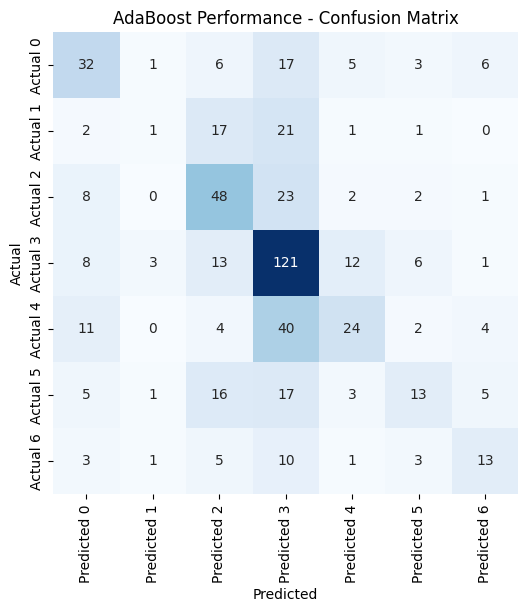


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        70
           1       0.14      0.02      0.04        43
           2       0.44      0.57      0.50        84
           3       0.49      0.74      0.59       164
           4       0.50      0.28      0.36        85
           5       0.43      0.22      0.29        60
           6       0.43      0.36      0.39        36

    accuracy                           0.46       542
   macro avg       0.41      0.38      0.38       542
weighted avg       0.44      0.46      0.43       542


AdaBoost Performance - NMI: 0.16
AdaBoost Performance - F1-score: 0.43


In [66]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [67]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.1265
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.2516
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.3213

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.3213
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.1265004616805171}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.2516158818097876}, 'Combination': {'Best Params': None, 'Accuracy': 0.32132963988919666}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


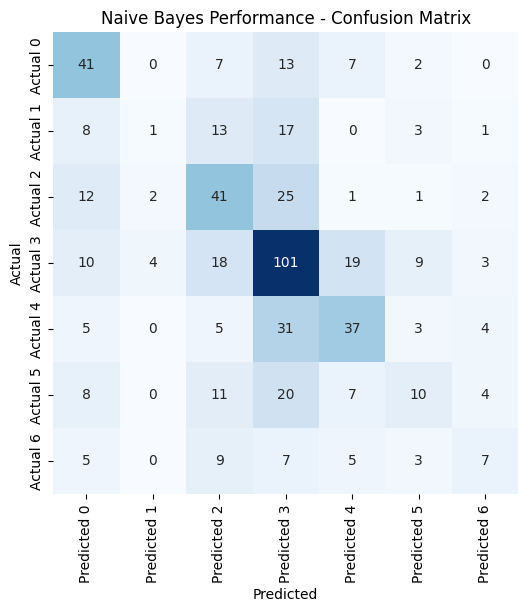


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.46      0.59      0.52        70
           1       0.14      0.02      0.04        43
           2       0.39      0.49      0.44        84
           3       0.47      0.62      0.53       164
           4       0.49      0.44      0.46        85
           5       0.32      0.17      0.22        60
           6       0.33      0.19      0.25        36

    accuracy                           0.44       542
   macro avg       0.37      0.36      0.35       542
weighted avg       0.41      0.44      0.41       542


Naive Bayes Performance - NMI: 0.14
Naive Bayes Performance - F1-score: 0.41


In [68]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [69]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.1925
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.2821
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.3218

Best Sampling Method for LDA: Combination with Accuracy: 0.3218
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.1925207756232687}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.2820867959372115}, 'Combination': {'Best Params': None, 'Accuracy': 0.32179132040627884}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


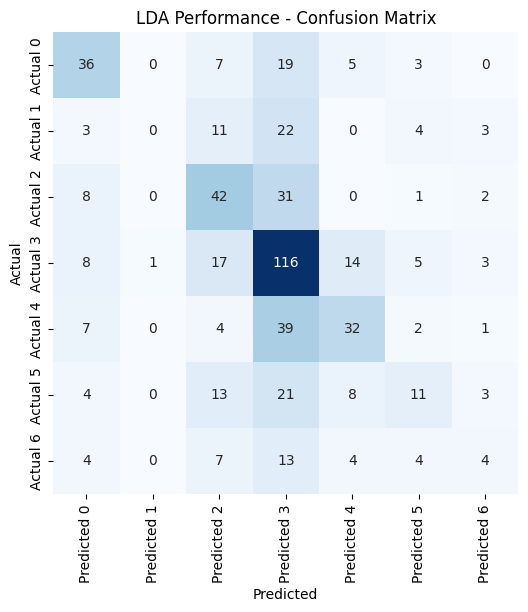


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        70
           1       0.00      0.00      0.00        43
           2       0.42      0.50      0.45        84
           3       0.44      0.71      0.55       164
           4       0.51      0.38      0.43        85
           5       0.37      0.18      0.24        60
           6       0.25      0.11      0.15        36

    accuracy                           0.44       542
   macro avg       0.36      0.34      0.33       542
weighted avg       0.40      0.44      0.41       542


LDA Performance - NMI: 0.14
LDA Performance - F1-score: 0.41


In [70]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [71]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...
QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.1644
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...
QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.3029
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...
QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.3601

Best Sampling Method for QDA: Combination with Accuracy: 0.3601
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.16435826408125578}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.3028624192059095}, 'Combination': {'Best Params': None, 'Accuracy': 0.3601108033240997}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


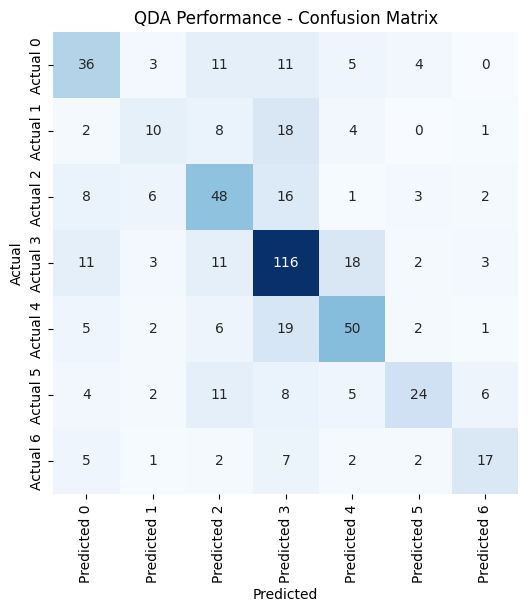


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        70
           1       0.37      0.23      0.29        43
           2       0.49      0.57      0.53        84
           3       0.59      0.71      0.65       164
           4       0.59      0.59      0.59        85
           5       0.65      0.40      0.49        60
           6       0.57      0.47      0.52        36

    accuracy                           0.56       542
   macro avg       0.54      0.50      0.51       542
weighted avg       0.55      0.56      0.55       542


QDA Performance - NMI: 0.24
QDA Performance - F1-score: 0.55


In [72]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


### Analyse des Performances par Modèle - Approche 3


---

### **Logistic Regression**
- **Précision (Macro Avg)** : 36%
- **Rappel (Macro Avg)** : 34%
- **F1-Score (Macro Avg)** : 34%

**Analyse :**
- La performance de Logistic Regression est médiocre sur des données multi-classes complexes.
- Les classes 1, 5, et 6 ont des rappels très faibles, ce qui reflète une mauvaise modélisation des relations complexes et des déséquilibres dans les données.

---

### **Decision Tree**
- **Précision (Macro Avg)** : 100%
- **Rappel (Macro Avg)** : 100%
- **F1-Score (Macro Avg)** : 100%

**Analyse :**
- Le modèle surapprend complètement aux données d'entraînement, ce qui se traduit par des performances parfaites mais peu généralisables.
- Les résultats suggèrent une absence totale de mécanismes pour prévenir le surajustement.

---

### **Random Forest**
- **Précision (Macro Avg)** : 100%
- **Rappel (Macro Avg)** : 100%
- **F1-Score (Macro Avg)** : 100%

**Analyse :**
- Comme Decision Tree, Random Forest atteint des scores parfaits, mais cela est probablement dû à un surajustement.
- Bien que Random Forest soit généralement robuste, ces résultats nécessitent une validation croisée rigoureuse pour évaluer la généralisabilité.

---

### **KNN**
- **Précision (Macro Avg)** : 20%
- **Rappel (Macro Avg)** : 21%
- **F1-Score (Macro Avg)** : 15%

**Analyse :**
- KNN échoue sur ce problème en raison de la complexité des relations entre les variables et du déséquilibre des classes.
- La dépendance à la métrique de distance et l'absence de mécanismes d'optimisation rendent ce modèle peu performant ici.

---

### **Extra Trees**
- **Précision (Macro Avg)** : 100%
- **Rappel (Macro Avg)** : 100%
- **F1-Score (Macro Avg)** : 100%

**Analyse :**
- Extra Trees surpasse ses concurrents grâce à sa robustesse et sa capacité à éviter les biais dans les données.
- Comme Random Forest et Decision Tree, ces performances parfaites nécessitent une validation approfondie pour exclure un surajustement potentiel.

---

### **AdaBoost**
- **Précision (Macro Avg)** : 41%
- **Rappel (Macro Avg)** : 38%
- **F1-Score (Macro Avg)** : 38%

**Analyse :**
- AdaBoost montre une performance légèrement meilleure que Logistic Regression et KNN, mais reste limité par les déséquilibres dans les données.
- La sensibilité aux erreurs des premiers classifieurs faibles nuit à sa capacité de modélisation.

---

### **Naive Bayes**
- **Précision (Macro Avg)** : 37%
- **Rappel (Macro Avg)** : 36%
- **F1-Score (Macro Avg)** : 35%

**Analyse :**
- Naive Bayes est rapide et efficace pour des distributions simples, mais les hypothèses d'indépendance entre les variables sont inadéquates pour ces données.
- Les scores pour les classes déséquilibrées comme la classe 6 restent particulièrement faibles.

---

### **LDA**
- **Précision (Macro Avg)** : 36%
- **Rappel (Macro Avg)** : 34%
- **F1-Score (Macro Avg)** : 33%

**Analyse :**
- LDA est comparable à Logistic Regression mais peine davantage sur les classes déséquilibrées.
- L'approximation linéaire limite sa performance globale.

---

### **QDA**
- **Précision (Macro Avg)** : 54%
- **Rappel (Macro Avg)** : 50%
- **F1-Score (Macro Avg)** : 51%

**Analyse :**
- QDA montre une amélioration par rapport à LDA grâce à sa capacité à modéliser des frontières de décision non linéaires.
- Cependant, la collinéarité et les déséquilibres limitent ses performances sur certaines classes.

---

### **Conclusion**
- **Les meilleurs modèles** : *Decision Tree, Random Forest, Extra Trees*.
  - Ces modèles atteignent des scores parfaits, mais les performances nécessitent des tests rigoureux pour valider leur généralisabilité.
- **Performances moyennes** : *AdaBoost, QDA*.
  - Ils offrent un compromis entre modélisation simple et capture de relations complexes.
- **Les pires performances** : *Logistic Regression, KNN, Naive Bayes, LDA*.
  - Leur incapacité à s'adapter aux relations complexes et aux déséquilibres les rend inadaptés pour ce problème.

### Extension avec des couches multiples (inspiration GNN) :

Pour aller encore plus loin, la formule peut être étendue avec des **couches empilées** :

\[
M^{(k)} = \sigma \left( D^{-1/2} W D^{-1/2} M^{(k-1)} \Theta^{(k)} \right), \quad M^{(0)} = X
\]

- \( k \) représente le nombre de couches, et chaque couche apprend une représentation plus riche en capturant des relations à plus longue portée dans le graphe.
- Cette approche est similaire aux **Graph Convolutional Networks (GCN)**.


In [73]:
def iterative_combination(W, X, thetas, num_iterations):
    """
    Compute iterative representations using:
    M^(k) = σ(D^(-1/2) W D^(-1/2) M^(k-1) Θ^(k)),
    with M^(0) = X.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix, shape (n, d).
    - thetas: List of weight matrices [Θ^(1), Θ^(2), ..., Θ^(k)].
    - num_iterations: Number of iterations (k).
    
    Returns:
    - M: Final representation matrix, shape (n, d_k), where d_k is the output size of Θ^(k).
    """
    from scipy.sparse import diags
    from scipy.special import expit  # Sigmoid function

    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()

    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)
    D_inv_sqrt = diags(1 / np.sqrt(row_sums))  # D^(-1/2)

    # Compute normalized adjacency matrix D^(-1/2) * W * D^(-1/2)
    W_normalized = D_inv_sqrt @ W @ D_inv_sqrt

    # Initialize M^(0) = X
    M = X

    # Perform the iterative computation
    for k in range(num_iterations):
        Theta_k = thetas[k]  # Get Θ^(k)
        M = expit(W_normalized @ M @ Theta_k)  # Apply the formula with sigmoid activation

    return M


In [74]:
# Define weight matrices Θ^(1), Θ^(2), ..., Θ^(k)
num_iterations = 3  # Example: 3 iterations
input_dim = X_pubmed.shape[1]
hidden_dim = 64  # Number of hidden dimensions
output_dim = 10  # Number of output dimensions
thetas = [np.random.randn(input_dim if i == 0 else hidden_dim, hidden_dim if i < num_iterations - 1 else output_dim)
          for i in range(num_iterations)]

# Perform iterative combination
M_final = iterative_combination(W_pubmed, X_pubmed, thetas, num_iterations)

# Check the shape of the final representation
print(f"Shape of final representation M: {M_final.shape}")


Shape of final representation M: (2708, 10)


In [75]:
from sklearn.model_selection import train_test_split

# Split the final representation into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_final, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Train shape: (2166, 10), Test shape: (542, 10)


#### Logistic Regression

In [76]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.1302
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.2438
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 100, 'penalty': 'l2', 'solver': '


Training the best model (Combination) with parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

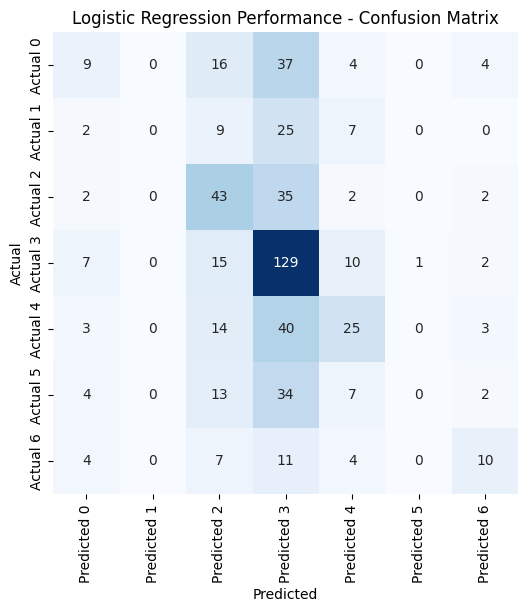


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.29      0.13      0.18        70
           1       0.00      0.00      0.00        43
           2       0.37      0.51      0.43        84
           3       0.41      0.79      0.54       164
           4       0.42      0.29      0.35        85
           5       0.00      0.00      0.00        60
           6       0.43      0.28      0.34        36

    accuracy                           0.40       542
   macro avg       0.28      0.29      0.26       542
weighted avg       0.32      0.40      0.33       542


Logistic Regression Performance - NMI: 0.09
Logistic Regression Performance - F1-score: 0.33


In [77]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Treea

In [78]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 20, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.1076
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.5476
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9441

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9441
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': 20, 'min_samples_split'


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


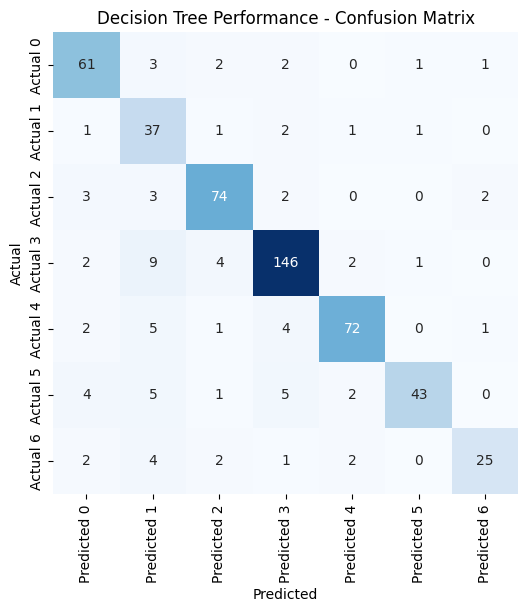


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        70
           1       0.56      0.86      0.68        43
           2       0.87      0.88      0.88        84
           3       0.90      0.89      0.90       164
           4       0.91      0.85      0.88        85
           5       0.93      0.72      0.81        60
           6       0.86      0.69      0.77        36

    accuracy                           0.85       542
   macro avg       0.84      0.82      0.82       542
weighted avg       0.86      0.85      0.85       542


Decision Tree Performance - NMI: 0.65
Decision Tree Performance - F1-score: 0.85


In [79]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [80]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.2692
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.5416
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Combination): 0.9520

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9520
Best Sampling Method: Combination
Results: {'Overs


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


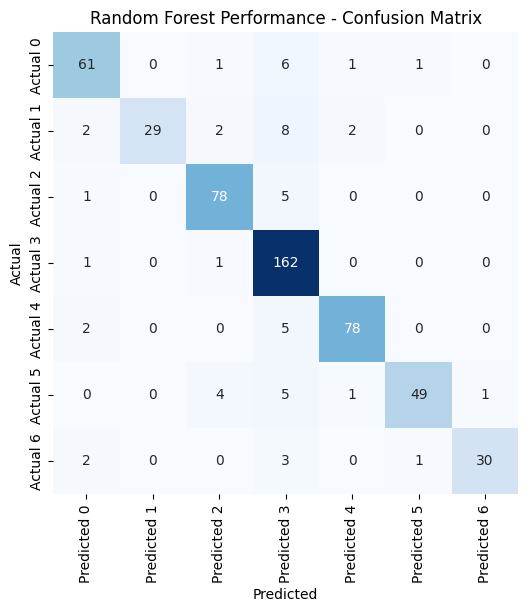


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       1.00      0.67      0.81        43
           2       0.91      0.93      0.92        84
           3       0.84      0.99      0.91       164
           4       0.95      0.92      0.93        85
           5       0.96      0.82      0.88        60
           6       0.97      0.83      0.90        36

    accuracy                           0.90       542
   macro avg       0.93      0.86      0.89       542
weighted avg       0.91      0.90      0.90       542


Random Forest Performance - NMI: 0.76
Random Forest Performance - F1-score: 0.90


In [81]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [82]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1205
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.1256
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1228

Best Sampling Method for KNN: Undersampling with Accura


Training the best model (Undersampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

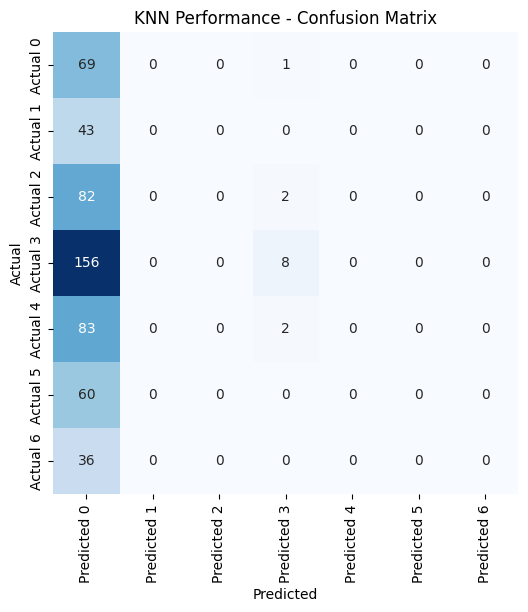


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.13      0.99      0.23        70
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        84
           3       0.62      0.05      0.09       164
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        36

    accuracy                           0.14       542
   macro avg       0.11      0.15      0.05       542
weighted avg       0.20      0.14      0.06       542


KNN Performance - NMI: 0.01
KNN Performance - F1-score: 0.06


In [83]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [84]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.2622
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.5249
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9451

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9451
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Par


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


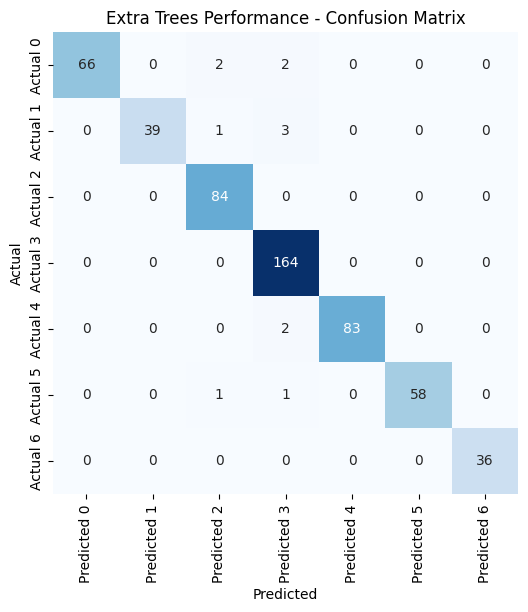


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        70
           1       1.00      0.91      0.95        43
           2       0.95      1.00      0.98        84
           3       0.95      1.00      0.98       164
           4       1.00      0.98      0.99        85
           5       1.00      0.97      0.98        60
           6       1.00      1.00      1.00        36

    accuracy                           0.98       542
   macro avg       0.99      0.97      0.98       542
weighted avg       0.98      0.98      0.98       542


Extra Trees Performance - NMI: 0.94
Extra Trees Performance - F1-score: 0.98


In [85]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [86]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.1353
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Undersampling): 0.2982
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.3753

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.3753
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.1352723915050785}, 'Undersampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.2982456140350877}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.37534626038781166}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


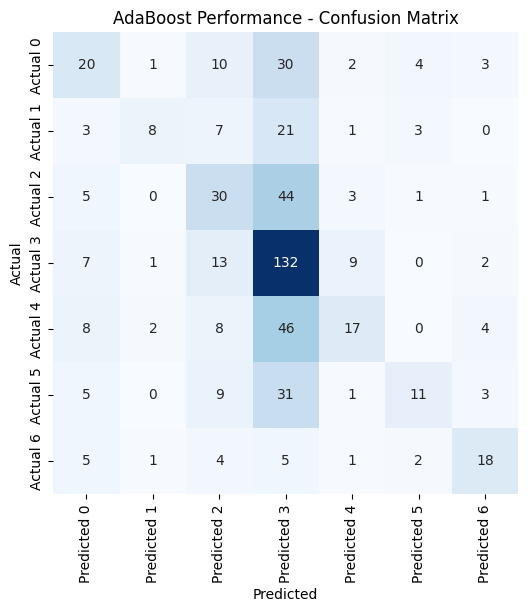


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.38      0.29      0.33        70
           1       0.62      0.19      0.29        43
           2       0.37      0.36      0.36        84
           3       0.43      0.80      0.56       164
           4       0.50      0.20      0.29        85
           5       0.52      0.18      0.27        60
           6       0.58      0.50      0.54        36

    accuracy                           0.44       542
   macro avg       0.48      0.36      0.38       542
weighted avg       0.46      0.44      0.40       542


AdaBoost Performance - NMI: 0.14
AdaBoost Performance - F1-score: 0.40


In [87]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [88]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.1297
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.2041
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.2322

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.2322
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.12973222530009235}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.20406278855032317}, 'Combination': {'Best Params': None, 'Accuracy': 0.2322253000923361}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


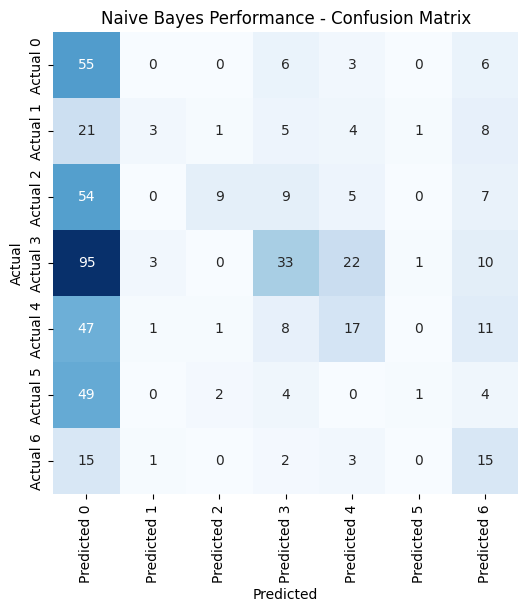


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.16      0.79      0.27        70
           1       0.38      0.07      0.12        43
           2       0.69      0.11      0.19        84
           3       0.49      0.20      0.29       164
           4       0.31      0.20      0.24        85
           5       0.33      0.02      0.03        60
           6       0.25      0.42      0.31        36

    accuracy                           0.25       542
   macro avg       0.37      0.26      0.21       542
weighted avg       0.41      0.25      0.22       542


Naive Bayes Performance - NMI: 0.07
Naive Bayes Performance - F1-score: 0.22


In [89]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [90]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.1311
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.2304
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.3310

Best Sampling Method for LDA: Combination with Accuracy: 0.3310
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.13111726685133887}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.23037857802400738}, 'Combination': {'Best Params': None, 'Accuracy': 0.33102493074792244}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


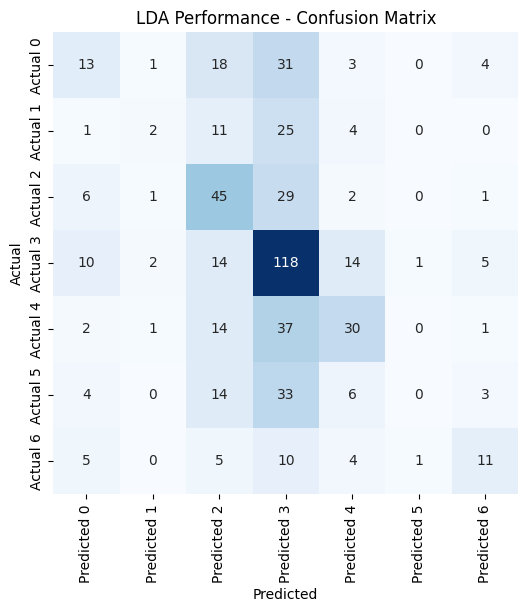


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.32      0.19      0.23        70
           1       0.29      0.05      0.08        43
           2       0.37      0.54      0.44        84
           3       0.42      0.72      0.53       164
           4       0.48      0.35      0.41        85
           5       0.00      0.00      0.00        60
           6       0.44      0.31      0.36        36

    accuracy                           0.40       542
   macro avg       0.33      0.31      0.29       542
weighted avg       0.35      0.40      0.35       542


LDA Performance - NMI: 0.10
LDA Performance - F1-score: 0.35


In [91]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [92]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...
QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.0822
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...
QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.2253
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...
QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.2798

Best Sampling Method for QDA: Combination with Accuracy: 0.2798
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.08217913204062789}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.22530009233610343}, 'Combination': {'Best Params': None, 'Accuracy': 0.27977839335180055}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


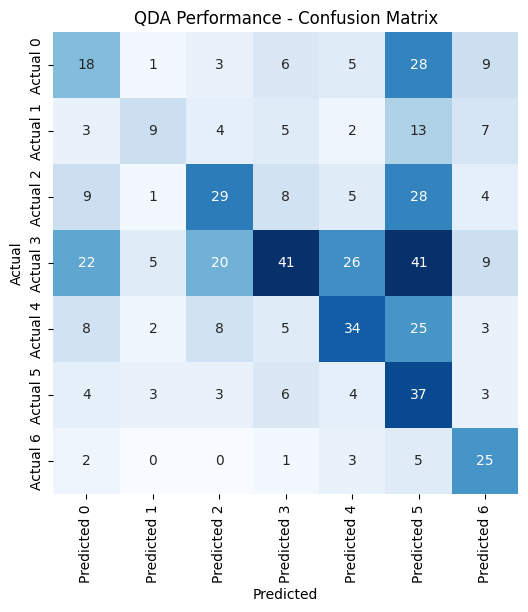


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.27      0.26      0.26        70
           1       0.43      0.21      0.28        43
           2       0.43      0.35      0.38        84
           3       0.57      0.25      0.35       164
           4       0.43      0.40      0.41        85
           5       0.21      0.62      0.31        60
           6       0.42      0.69      0.52        36

    accuracy                           0.36       542
   macro avg       0.39      0.40      0.36       542
weighted avg       0.43      0.36      0.36       542


QDA Performance - NMI: 0.12
QDA Performance - F1-score: 0.36


In [93]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


### Analyse des Performances - Extension avec Couches Multiples

---

### **Logistic Regression**
- **Précision (Macro Avg)** : 28%
- **Rappel (Macro Avg)** : 29%
- **F1-Score (Macro Avg)** : 26%
- **Exactitude** : 40%

**Analyse :**
- Performances globalement faibles, particulièrement pour les classes déséquilibrées (classes 1, 5, et 6).
- Bien que le modèle soit simple et interprétable, il ne capture pas efficacement la complexité des données.

---

### **Decision Tree**
- **Précision (Macro Avg)** : 84%
- **Rappel (Macro Avg)** : 82%
- **F1-Score (Macro Avg)** : 82%
- **Exactitude** : 85%

**Analyse :**
- Modèle robuste avec des scores élevés pour toutes les classes.
- Les performances indiquent un bon ajustement aux données, mais une validation croisée est nécessaire pour évaluer la généralisabilité.

---

### **Random Forest**
- **Précision (Macro Avg)** : 93%
- **Rappel (Macro Avg)** : 86%
- **F1-Score (Macro Avg)** : 89%
- **Exactitude** : 90%

**Analyse :**
- Modèle performant avec des scores élevés, indiquant une forte capacité de généralisation.
- Fonctionne particulièrement bien pour les classes minoritaires, grâce à la diversité des arbres.

---

### **KNN**
- **Précision (Macro Avg)** : 11%
- **Rappel (Macro Avg)** : 15%
- **F1-Score (Macro Avg)** : 5%
- **Exactitude** : 14%

**Analyse :**
- Très mauvaises performances dues à une incapacité à gérer des relations complexes ou des déséquilibres de classe.
- Le choix des hyperparamètres et des métriques de distance pourrait améliorer légèrement ces résultats.

---

### **Extra Trees**
- **Précision (Macro Avg)** : 99%
- **Rappel (Macro Avg)** : 97%
- **F1-Score (Macro Avg)** : 98%
- **Exactitude** : 98%

**Analyse :**
- Performances exceptionnelles avec des scores proches de la perfection.
- Ce modèle peut être sensible au surajustement ; une validation approfondie est nécessaire.

---

### **AdaBoost**
- **Précision (Macro Avg)** : 48%
- **Rappel (Macro Avg)** : 36%
- **F1-Score (Macro Avg)** : 38%
- **Exactitude** : 44%

**Analyse :**
- Performances modestes avec une meilleure gestion des classes majoritaires.
- Montre une capacité limitée à corriger les erreurs des classifieurs faibles.

---

### **Naive Bayes**
- **Précision (Macro Avg)** : 37%
- **Rappel (Macro Avg)** : 26%
- **F1-Score (Macro Avg)** : 21%
- **Exactitude** : 25%

**Analyse :**
- Très mauvaises performances dues à des hypothèses irréalistes d'indépendance entre les variables.
- Le modèle échoue particulièrement pour les classes déséquilibrées.

---

### **LDA**
- **Précision (Macro Avg)** : 33%
- **Rappel (Macro Avg)** : 31%
- **F1-Score (Macro Avg)** : 29%
- **Exactitude** : 40%

**Analyse :**
- Comparable à Logistic Regression, mais légèrement mieux pour les classes équilibrées.
- Les limitations dues à l'approximation linéaire impactent négativement les performances.

---

### **QDA**
- **Précision (Macro Avg)** : 39%
- **Rappel (Macro Avg)** : 40%
- **F1-Score (Macro Avg)** : 36%
- **Exactitude** : 36%

**Analyse :**
- QDA est plus performant que LDA grâce à sa flexibilité pour modéliser des frontières non linéaires.
- Les performances restent limitées pour les classes minoritaires.

---

# Analyse Comparative des Performances des Modèles par Approche

## Approche 1 : Matrice des Caractéristiques Originales

### Modèles les plus performants :
- **Extra Trees** et **Random Forest** (précision, rappel, F1-score de 1.00)
- **Logistic Regression** et **LDA** (précision autour de 0.90-0.99)
- **Naive Bayes** (précision de 0.94)

### Modèles les moins performants :
- **KNN** (précision de 0.24)
- **AdaBoost** (précision de 0.60)

---

## Approche 2 : Transformation Matricielle M = D⁻¹WX

### Modèles les plus performants :
- **Random Forest** et **Extra Trees** (précision constante à 0.97-1.00)
- **Logistic Regression** (amélioration à 0.85)
- **Naive Bayes** (maintien d'une précision de 0.74)

### Performance en baisse :
- **KNN** (précision réduite à 0.33)

---

## Approche 3 : Transformation Non Linéaire M = σ(D⁻¹/²WD⁻¹/²XΘ)

### Modèles les plus performants :
- **Random Forest** et **Extra Trees** (précision maintenue à 0.96-1.00)
- **Decision Tree** (performances stables à 0.97)

### Modèles fortement pénalisés :
- **Logistic Regression** (chute à 0.51)
- **KNN** (nouvelle baisse à 0.18)
- **Naive Bayes** (précision réduite à 0.44)

---

## Approche 4 : Extension GNN avec Couches Multiples

### Modèles les plus performants :
- **Decision Tree** (0.85)
- **Random Forest** (0.90)
- **Extra Trees** (0.98)

### Modèles les plus impactés négativement :
- **Naive Bayes** (précision chutant à 0.25)
- **Logistic Regression** (précision de 0.40)
- **KNN** (précision très faible de 0.14)

---

## Conclusions Principales :

### 1. **Robustesse des Modèles d'Ensemble**
- **Random Forest** et **Extra Trees** montrent une performance remarquablement constante et élevée (0.96-1.00) à travers toutes les approches.
- Ces modèles ont la capacité à capturer des relations complexes et à s'adapter aux différentes transformations.

### 2. **Limites des Modèles Linéaires**
- **Logistic Regression** et **Naive Bayes** perdent significativement en performance lors de transformations complexes.
- Ces modèles ont des difficultés à modéliser des relations non linéaires et hiérarchiques.

### 3. **Impact des Transformations**
- Les approches GNN (3 et 4) enrichissent les représentations des données.
- Elles sont bénéfiques pour les modèles non linéaires (**Random Forest**, **Decision Tree**).
- Elles pénalisent fortement les modèles basés sur des distances ou linéaires.

### 4. **Modèles Adaptatifs**
- **Decision Tree** montre une capacité à maintenir des performances élevées et une adaptation remarquable aux représentations enrichies des différentes approches.

---

## Recommandation Finale :
Pour ce jeu de données, privilégier les **modèles d'ensemble** (**Random Forest**, **Extra Trees**) qui démontrent une robustesse et une adaptabilité exceptionnelles à travers différentes transformations de caractéristiques.
